# HW 2 - _Group 18_ - HOW DO TAXIS MOVE IN NYC?

In this assignment we have to conduct an analysis of Yellow Cab Taxis in NYC. In particular, we have answered to some specific research questions (**RQs**) and core research questions (**CRQs**). The first step is read the homework questions and then download data of Taxi's trips in NYC from _www.nyc.gov_.

The data are divided in months (from January to June 2018). Each month contains around 9.000.000 Taxi's trips, so, due to the size of the files, we have worked with _**Pandas library**_, which is useful to manipulate huge numerical tables and time series. We decided to focus on a single month, performing all our analysis over a single dataset, and then repeated the same analysis on the other months. At the end of each question we have combined and motivated the results obtained. 

After a first look to the yellow cab data, we realized that lots of data were incorrect or in the wrong month.
We decided therefore to delete all the mistakes in accordance with the required assignment questions. We've analyzed these column indexes:
- **tpep_pickup_datetime**: the date and time when the meter was engaged;
- **tpep_dropoff_datetime**: The date and time when the meter was disengaged;
- **passenger_count**: the number of passengers in the vehicle;
- **trip_distance**: the elapsed trip distance in miles reported by the taximeter;
- **PULocationID**: TLC Taxi Zone in which the taximeter was engaged;
- **DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged.

Occasionally, we have loaded some additional columns, which were needed in some specific RQs, such as the ***fare_amount*** (the raw cost of the taxi trip), or the ***payment_type*** (the method used to pay the taxi trip), putting some conditions on them, if necessary.

# Homework 2

First of all we have to import:
- _**date time module**_: to manipulate dates and times in DataFrame;
- _**pandas library**_: to generate and analize data frames.
- _**numpy library**_: to operate with mathematical functions and multi-dimensional arrays.

Some additional modules have been imported when needed (for example, for statistical analysis or scatter plots)

In [1]:
import datetime as dt

import pandas as pd

import numpy as np

## Taxi Zone

Before cleaning data, we create the DataFrame of ***taxi _zone_lookup*** file, which contains all LocationID and Borough of NYC. 

Then, we create a dictionary (***dfdict***) of boroughs, and build the list of locations for each borough (6 boroughs vs of 265 NY locations). This dictionary will be used, in some RQs, to pair the LocationID with the respective Borough.

In [2]:
df = pd.read_csv("taxi _zone_lookup.csv")

dfdict = {'EWR': [], 'Queens': [], 'Bronx': [], 'Manhattan': [], 'Staten Island': [], 'Brooklyn': [], 'Unknown': []}

for i in range(len(df)):    
    dfdict[df["Borough"][i]].append(df["LocationID"][i])

# Cleaning Data


Now, for each month, we read and clean all the DataFrames specifying the column indexes that we want to analyze.

Also, we use ***parse_dates = date_columns*** to return the entire columns unaltered as an object data type.

The following code represents the standard implementation of the data cleaning we have used in most RQs. Sometimes, as already stated before, additional columns and cleaning conditions have been added, in order to address specific questions.

### January

In [3]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df1 = pd.read_csv('yellow_tripdata_2018-01.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

To verify the correct transformation of *pickup datetime* and *dropoff datetime* we use ***type()***:

In [4]:
type(df1.tpep_pickup_datetime[0])

type(df1.tpep_dropoff_datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

In each month we notice some errors about year and months. In this case, for January DataFrame (df1), we have to consider only 2018 and the month 1 (january). So, we delete, in *pickup datetime* and *dropoff datetime*, all rows with a different year and/or month.  

In [5]:
keep = df1[df1['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 1]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 1]

Moreover, we've found errors in days and hours. Infact, if we have only 2018 and january in both datetime columns, the *pickup day* cannot be a following day of *dropoff day*; this is impossible. *Pickup day* can be equal to *dropoff day* or can be one day/few days before of *dropoff day*. If the *pickup day* and *dropoff day* are the same, *pickup time* (h.min.sec) must be lower than *dropoff time*.

In [6]:
keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

Then, we concatenate on axis=0 the two conditions (*keep1* and *keep2*) to obtain the ***keep_jan*** dataframe cleaned by wrong dates.

In [7]:
keep_jan = pd.concat([keep1, keep2], axis=0)

Also, we want to delete long trip's durations, because normally taxi's rides are quick enough. 
We've fixed a limit of 5 hours. 

To obtain ***trip_duration_january*** we subtract *pickup datetime* to *dropoff datetime*.

In [8]:
keep_jan['trip_duration_january'] = keep_jan['tpep_dropoff_datetime'] - keep_jan['tpep_pickup_datetime']

# convert the trip duration to minutes
keep_jan['trip_duration_january'] = keep_jan['trip_duration_january'].dt.total_seconds()/60

# keep only trips which last less then 5 hours (= 300 minutes) 
keep_jan = keep_jan[keep_jan['trip_duration_january'] < 300]

We want to remove the ***Unknown Borough*** (LocationID = 264 and 265) from our DataFrame:

In [9]:
keep_jan = keep_jan[(keep_jan.PULocationID != 264) & (keep_jan.DOLocationID != 264) & (keep_jan.PULocationID != 265) & (keep_jan.DOLocationID != 265)]

Finally, we delete all ***'trip_distance'*** = 0: trip distance cannot be zero miles. 

In [10]:
keep_jan = keep_jan[keep_jan['trip_distance'] > 0]

We execute the same cleaning steps for all the other months:

### February

In [11]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df2 = pd.read_csv('yellow_tripdata_2018-02.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

keep = df2[df2['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 2]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 2]

keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

keep_feb = pd.concat([keep1, keep2], axis=0)

keep_feb['trip_duration_february'] = keep_feb['tpep_dropoff_datetime'] - keep_feb['tpep_pickup_datetime']

keep_feb['trip_duration_february'] = keep_feb['trip_duration_february'].dt.total_seconds()/60
 
keep_feb = keep_feb[keep_feb['trip_duration_february'] < 300]

keep_feb = keep_feb[(keep_feb.PULocationID != 264) & (keep_feb.DOLocationID != 264) & (keep_feb.PULocationID != 265) & (keep_feb.DOLocationID != 265)]

keep_feb = keep_feb[keep_feb['trip_distance'] > 0]

### March

In [12]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df3 = pd.read_csv('yellow_tripdata_2018-03.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

keep = df3[df3['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 3]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 3]

keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

keep_mar = pd.concat([keep1, keep2], axis=0)

keep_mar['trip_duration_march'] = keep_mar['tpep_dropoff_datetime'] - keep_mar['tpep_pickup_datetime']

keep_mar['trip_duration_march'] = keep_mar['trip_duration_march'].dt.total_seconds()/60
 
keep_mar = keep_mar[keep_mar['trip_duration_march'] < 300]

keep_mar = keep_mar[(keep_mar.PULocationID != 264) & (keep_mar.DOLocationID != 264) & (keep_mar.PULocationID != 265) & (keep_mar.DOLocationID != 265)]

keep_mar = keep_mar[keep_mar['trip_distance'] > 0]

### April

In [13]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df4 = pd.read_csv('yellow_tripdata_2018-04.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

keep = df4[df4['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 4]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 4]

keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

keep_apr = pd.concat([keep1, keep2], axis=0)

keep_apr['trip_duration_april'] = keep_apr['tpep_dropoff_datetime'] - keep_apr['tpep_pickup_datetime']

keep_apr['trip_duration_april'] = keep_apr['trip_duration_april'].dt.total_seconds()/60
 
keep_apr = keep_apr[keep_apr['trip_duration_april'] < 300]

keep_apr = keep_apr[(keep_apr.PULocationID != 264) & (keep_apr.DOLocationID != 264) & (keep_apr.PULocationID != 265) & (keep_apr.DOLocationID != 265)]

keep_apr = keep_apr[keep_apr['trip_distance'] > 0]

### May

In [14]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df5 = pd.read_csv('yellow_tripdata_2018-05.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

keep = df5[df5['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 5]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 5]

keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

keep_may = pd.concat([keep1, keep2], axis=0)

keep_may['trip_duration_may'] = keep_may['tpep_dropoff_datetime'] - keep_may['tpep_pickup_datetime']

keep_may['trip_duration_may'] = keep_may['trip_duration_may'].dt.total_seconds()/60
 
keep_may = keep_may[keep_may['trip_duration_may'] < 300]

keep_may = keep_may[(keep_may.PULocationID != 264) & (keep_may.DOLocationID != 264) & (keep_may.PULocationID != 265) & (keep_may.DOLocationID != 265)]

keep_may = keep_may[keep_may['trip_distance'] > 0]

### June

In [15]:
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df6 = pd.read_csv('yellow_tripdata_2018-06.csv', usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], parse_dates = date_columns)

keep = df6[df6['tpep_pickup_datetime'].dt.year == 2018]

keep = keep[keep['tpep_pickup_datetime'].dt.month == 6]

keep = keep[keep['tpep_dropoff_datetime'].dt.year == 2018]
keep = keep[keep['tpep_dropoff_datetime'].dt.month == 6]

keep1 = keep[keep['tpep_pickup_datetime'].dt.day == keep['tpep_dropoff_datetime'].dt.day]

keep1 = keep1[keep1['tpep_pickup_datetime'].dt.time < keep1['tpep_dropoff_datetime'].dt.time]

keep2 = keep[keep['tpep_pickup_datetime'].dt.day < keep['tpep_dropoff_datetime'].dt.day]

keep_jun = pd.concat([keep1, keep2], axis=0)

keep_jun['trip_duration_june'] = keep_jun['tpep_dropoff_datetime'] - keep_jun['tpep_pickup_datetime']

keep_jun['trip_duration_june'] = keep_jun['trip_duration_june'].dt.total_seconds()/60
 
keep_jun = keep_jun[keep_jun['trip_duration_june'] < 300]

keep_jun = keep_jun[(keep_jun.PULocationID != 264) & (keep_jun.DOLocationID != 264) & (keep_jun.PULocationID != 265) & (keep_jun.DOLocationID != 265)]

keep_jun = keep_jun[keep_jun['trip_distance'] > 0]

We will now start answering the given questions through algorithmic methods, and data analysis techniques. The general approach is to load the datasets we have cleaned at the beginning, and to create a copy, which can be modified without affecting the original dataframe. This solution allows us to execute multiple types of analysis on the same cleaned dataset, sometimes even in different RQs, without having to reload and clean the ***.csv files*** every time.

The output numbers, in some cases, appear to be out of order, or missing. This is due to the fact that sometimes multiple RQs have been addressed using the same dataset, or that some outputs, which were initially generated for testing and debugging purposes, have been successively cleared in order to save space, or for the sake of tidyness.

# RQ1

***In what period of the year Taxis are used more?***

We are going to analyze the ***daily average*** of the number of trips, in every month, for every borough (EWR, Queens, Bronx, Manhattan, Staten Island, Brooklyn), to find out what is the month with the highest daily average, and how this result varies among the different locations. We choose to focus on the trips starting in each borough, i.e. the "***pickups***".

### January

In [10]:
# create a copy final_jan of the cleaned dataframe keep_jan
# this copy will be edited in the next steps, leaving the original cleaned dataset unaltered

final_jan = keep_jan.copy()

In [ ]:
# count daily trips based on pickup datetime
# count total trips based on location

date_time_col = final_jan['tpep_pickup_datetime']
location_col = final_jan['PULocationID']

# create series "final_jan_loc", of counts by location
# create series "final_jan", of daily counts

final_jan_loc = location_col.groupby(location_col).count()
final_jan = date_time_col.groupby(date_time_col.dt.day).count()

In [ ]:
# compute mean

mean1 = final_jan.mean()
mean1

In January, we have, on average, approximately ***274776*** trips every day.

In [37]:
del final_jan

The following code is used to count the number of trips starting in each location, and assign them to the right borough.

In [ ]:
# count total number of trips for each borough

# this dictionary contains the count for each borough

borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

# for every total count in final_jan_loc
for i in range(1, len(final_jan_loc)):
    
    # get the corresponding LocationID
    LocationID = final_jan_loc.index[i]
    
    # check to what borough it belongs
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            
            # add the count for that location to the correct borough
            borough_count[borough] = borough_count[borough] + int(final_jan_loc[LocationID])
            
borough_count

In [38]:
del final_jan_loc

In [ ]:
# compute means from total counts 

# for every borough

for borough in borough_count:
    
    # divide count by the number of days in the month
    
    borough_count[borough] = borough_count[borough]/31
    
borough_count

In [ ]:
# Convert list of boroughs and list of daily means to DataFrame

df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily average"])
merge = df_borough.join(df_means)
merge

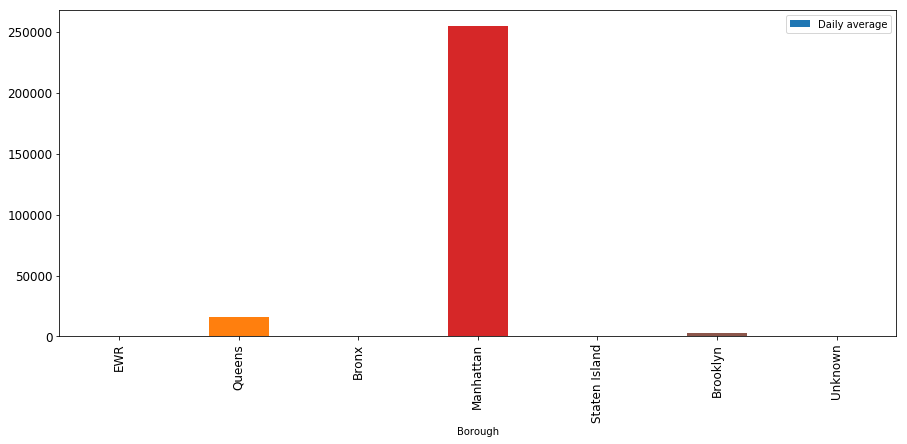

In [20]:
# Plot an bar graph

barplot = merge.plot(x="Borough", y="Daily average", kind='bar', figsize = (15, 6), fontsize = 12)

The bar plot shows that the daily average of trips starting in Manhattan is undeniably higher than the daily average in any other borough. The reason for this is the known fact that yellow taxis run mostly from Manhattan to the other boroughs.


We are now going to perform the same kind of analysis for the other months.

### February

In [22]:
final_feb = keep_feb.copy()

In [ ]:
date_time_col = final_feb['tpep_pickup_datetime']
location_col = final_feb['PULocationID']

final_feb_loc = location_col.groupby(location_col).count()
final_feb = date_time_col.groupby(date_time_col.dt.day).count()

In [ ]:
mean2 = final_feb.mean()
mean2

In February, we have, on average, approximately ***295547*** trips every day.

In [35]:
del final_feb

In [ ]:
borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

for i in range(1, len(final_feb_loc)):
    LocationID = final_feb_loc.index[i]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough] = borough_count[borough] + int(final_feb_loc[LocationID])
            
borough_count

In [ ]:
for borough in borough_count:    
    borough_count[borough] = borough_count[borough]/28
    
borough_count

In [36]:
del final_feb_loc

In [ ]:
df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily average"])
merge = df_borough.join(df_means)
merge

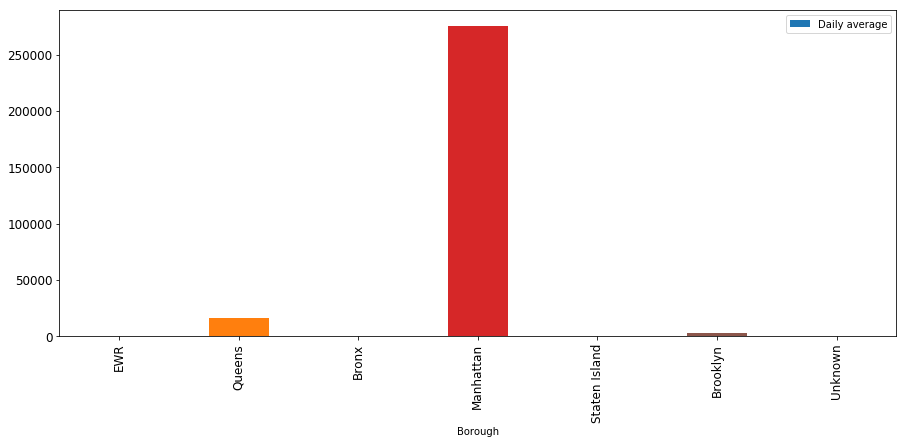

In [32]:
barplot = merge.plot(x="Borough", y="Daily average", kind='bar', figsize = (15, 6), fontsize = 12)

Again, the bar plot shows that the daily average of trips starting in Manhattan is higher than the daily average in any other borough.

### March

In [4]:
final_mar = keep_mar.copy()

In [ ]:
date_time_col = final_mar['tpep_pickup_datetime']
location_col = final_mar['PULocationID']

final_mar_loc = location_col.groupby(location_col).count()
final_mar = date_time_col.groupby(date_time_col.dt.day).count()
final_mar

In [ ]:
mean3 = final_mar.mean()
mean3

In March we have, on average, approximately ***295906*** trips every day.

In [7]:
del final_mar

In [ ]:
borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

for i in range(1, len(final_mar_loc)):
    LocationID = final_mar_loc.index[i]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough] = borough_count[borough] + int(final_mar_loc[LocationID])
            
borough_count

In [13]:
del final_mar_loc

In [ ]:
for borough in borough_count:    
    borough_count[borough] = borough_count[borough]/31
    
borough_count

In [ ]:
df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily average"])
merge = df_borough.join(df_means)
merge

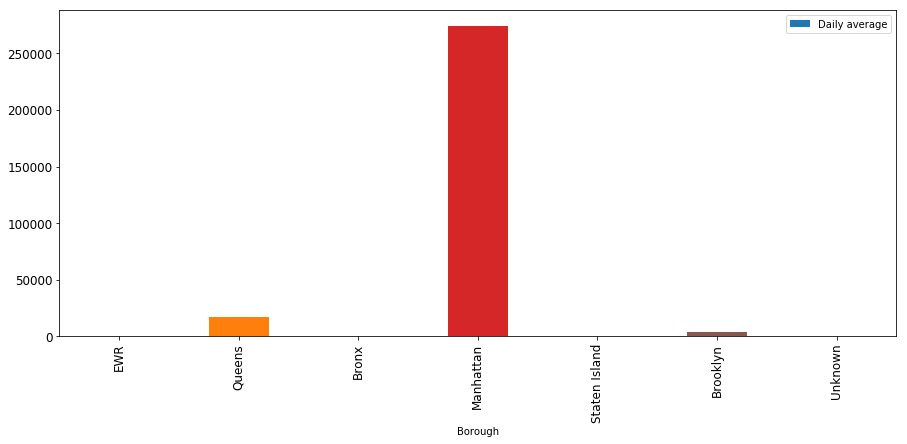

In [18]:
barplot = merge.plot(x="Borough", y="Daily average", kind='bar', figsize = (15, 6), fontsize = 12)

### April

In [21]:
final_apr = keep_apr.copy()

In [ ]:
date_time_col = final_apr['tpep_pickup_datetime']
location_col = final_apr['PULocationID']

final_apr_loc = location_col.groupby(location_col).count()
final_apr = date_time_col.groupby(date_time_col.dt.day).count()
final_apr

In [ ]:
mean4 = final_apr.mean()
mean4

In April we have, on average, approximately ***302203*** trips every day.

In [24]:
del final_apr

In [ ]:
borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

for i in range(1, len(final_apr_loc)):
    LocationID = final_apr_loc.index[i]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough] = borough_count[borough] + int(final_apr_loc[LocationID])
            
borough_count

In [26]:
del final_apr_loc

In [ ]:
for borough in borough_count:    
    borough_count[borough] = borough_count[borough]/30
    
borough_count

In [ ]:
df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily average"])
merge = df_borough.join(df_means)
merge

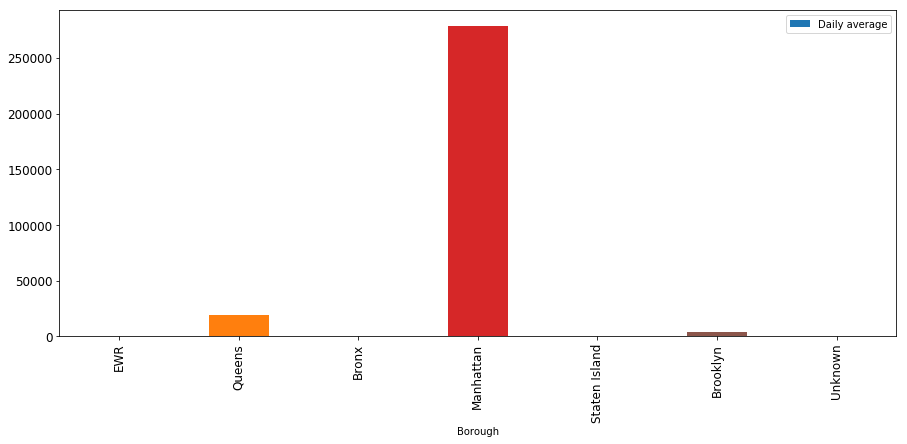

In [31]:
barplot = merge.plot(x="Borough", y="Daily average", kind='bar', figsize = (15, 6), fontsize = 12)

### May

In [5]:
final_may = keep_may.copy()

In [ ]:
date_time_col = final_may['tpep_pickup_datetime']
location_col = final_may['PULocationID']

final_may_loc = location_col.groupby(location_col).count()
final_may = date_time_col.groupby(date_time_col.dt.day).count()
final_may

In [7]:
mean5 = final_may.mean()
mean5

290421.48387096776

In May we have, on average, approximately ***290421*** trips every day.

In [8]:
del final_may

In [ ]:
borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

for i in range(1, len(final_may_loc)):
    LocationID = final_may_loc.index[i]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough] = borough_count[borough] + int(final_may_loc[LocationID])
            
borough_count

In [10]:
del final_may_loc

In [ ]:
for borough in borough_count:
    borough_count[borough] = borough_count[borough]/31
    
borough_count

In [ ]:
df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily mean"])
merge = df_borough.join(df_means)
merge

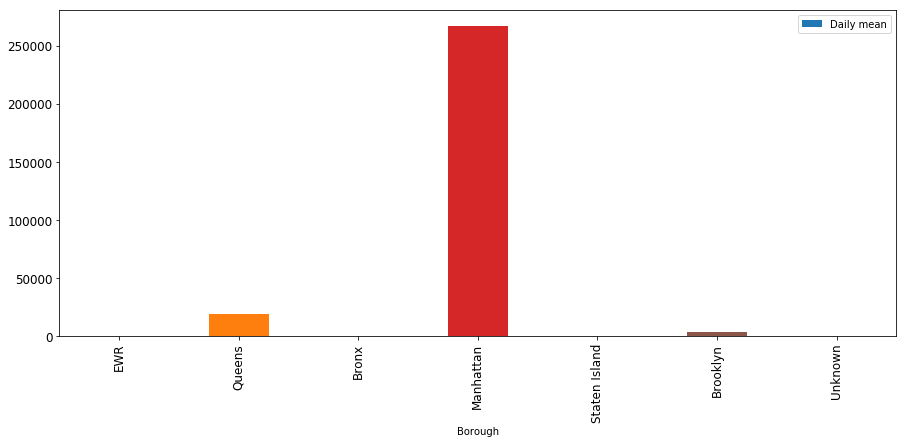

In [14]:
barplot = merge.plot(x="Borough", y="Daily mean", kind='bar', figsize = (15, 6), fontsize = 12)

### June

In [17]:
final_jun = keep_jun.copy()

In [ ]:
date_time_col = final_jun['tpep_pickup_datetime']
location_col = final_jun['PULocationID']

final_jun_loc = location_col.groupby(location_col).count()
final_jun = date_time_col.groupby(date_time_col.dt.day).count()
final_jun

In [ ]:
mean6 = final_jun.mean()
mean6

In June we have, on average, approximately ***283162*** trips every day.

In [22]:
del final_jun

In [ ]:
borough_count = {'EWR': 0, 'Queens': 0, 'Bronx': 0, 'Manhattan': 0, 'Staten Island': 0, 'Brooklyn': 0, 'Unknown': 0}

for i in range(1, len(final_jun_loc)):
    LocationID = final_jun_loc.index[i]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough] = borough_count[borough] + int(final_jun_loc[LocationID])
            
borough_count

In [24]:
del final_jun_loc

In [ ]:
for borough in borough_count:
    borough_count[borough] = borough_count[borough]/30
    
borough_count

In [ ]:
df_borough = pd.DataFrame(list(borough_count.keys()), columns = ["Borough"])
df_means = pd.DataFrame(list(borough_count.values()), columns = ["Daily mean"])
merge = df_borough.join(df_means)
merge

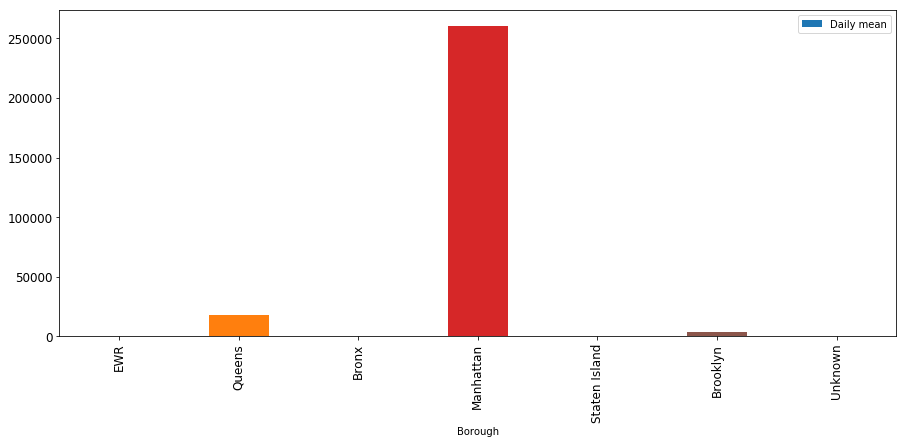

In [27]:
barplot = merge.plot(x="Borough", y="Daily mean", kind='bar', figsize = (15, 6), fontsize = 12)

### Global NY analysis

In [ ]:
# build list of means

l1 = [mean1, mean2, mean3, mean4, mean5, mean6]
l1

In [ ]:
df_mean = pd.DataFrame(l1, columns = ['daily average'])
df_mean

In [30]:
l2 = ['january', 'february', 'march', 'april', 'may', 'june']

In [ ]:
df_month = pd.DataFrame(l2, columns = ['month'])
df_month

In [32]:
merge = df_month.join(df_mean)
merge

,month,daily average
0,january,274776.806452
1,february,295547.678571
2,march,295906.032258
3,april,302203.500000
4,may,290421.483871
5,june,283162.966667


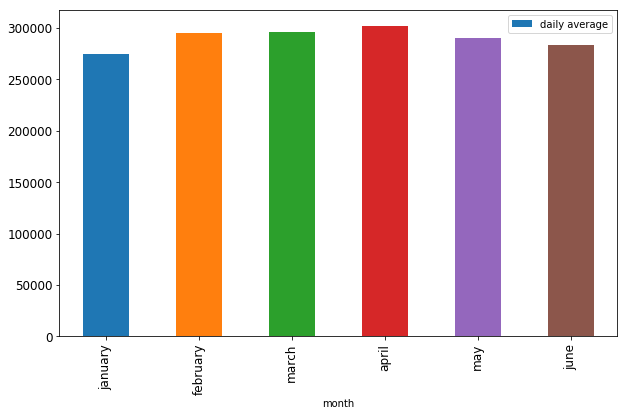

In [33]:
barplot = merge.plot(x = 'month', y = 'daily average', kind = 'bar', figsize = (10, 6), fontsize = 12)

The plot shows how the average number of trips recorded each day is slightly increasing in the first four months of the 2018, reaching a peak in April, and then starting a gradual descent towards June. This result is somehow surprising since, in principle, we could expect a higher number of taxi trips in the colder, winter months, when a taxi trip can be preferred over different kinds of transport.

# RQ2

***What are the time slots with more passengers?***

We are now going to analyze the ***number of passengers*** carried by yellow taxis in different time slots during the day. We identify ***24 time slots*** (0 ~ 23) corresponding to the hours of the day (0:00 ~ 1:00 AM, 1:00 ~ 2:00 AM, 2:00 ~ 3:00 AM, etc.). This choice appears quite reasonable, since it allows us to cover the entire spectrum of moments in the day with sufficient precision, without overcrowding the plots with an excessively dense graphical representation.

### January

In [11]:
final_jan = keep_jan.copy()

In [ ]:
# format pickup datetime column, leaving only the hours (selected time slots)

final_jan['tpep_pickup_datetime'] = final_jan['tpep_pickup_datetime'].dt.hour

In [ ]:
final_jan = final_jan.groupby(['tpep_pickup_datetime','PULocationID'])["passenger_count"].sum()

The general strategy, which will be repeated for the other months as well, is to fill a dictionary of lists of 24 elements, corresponding to the passengers count, in the given borough, for the corresponding time slot.

In [16]:
# count total number of trips for each borough, and for each time slot

# this dictionary contains the count for each borough

overall_count = [0]*24

borough_count = {'EWR': [0]*24, 'Queens': [0]*24, 'Bronx': [0]*24, 'Manhattan': [0]*24, 'Staten Island': [0]*24, 'Brooklyn': [0]*24, 'Unknown': [0]*24}

# for every total count in final_jan_loc, get the corresponding time slot, and LocationID
# check what borough the location belongs to, and 
# add the count for that location to the correct borough and time slot

for i in range(0, len(final_jan)):
    time_slot = final_jan.index[i][0]
    LocationID = final_jan.index[i][1]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough][int(time_slot)] = borough_count[borough][int(time_slot)] + int(final_jan[time_slot][LocationID])

    overall_count[int(time_slot)] = overall_count[int(time_slot)] + int(final_jan[time_slot][LocationID])
    
del final_jan

We are now going to comment the plots for the number of passengers in the different time slots and in the different months. Since the conclusions appear to be quite similar for the six months under study, we will make some notes on the plots of January, and then observe how they keep being valid in the other periods of the year.

### January: NY

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_overallcount = pd.DataFrame(overall_count, columns = ["NY: n° of passengers"])
merge = df_time_slot.join(df_overallcount)

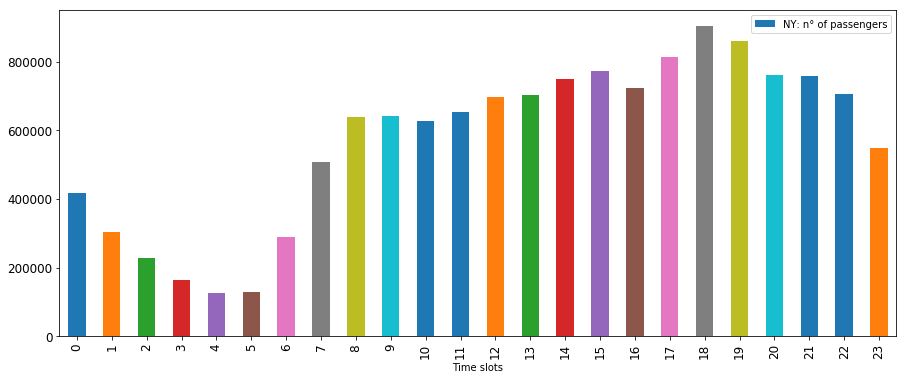

In [19]:
# Plot an bar graph

barplot = merge.plot(x="Time slots", y="NY: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

The overall distribution for the number of passengers, in the different time slots, shows a steep increase during the first hours of the day, starting around ***6:00 AM***, as it is reasonable to expect, since people are starting to get out at the beginning of the working day. The number of passengers keeps increasing slightly during the day until it reaches a peak around ***18:00 PM***, which is approximately the time when people start getting back home. So, once again, the result of the analysis finds a direct justification.

More interesting behaviours can be observed, though, when we start analyzing the same plot for the single boroughs.

### January: EWR

In [ ]:
df_count = pd.DataFrame(borough_count["EWR"], columns = ["EWR: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

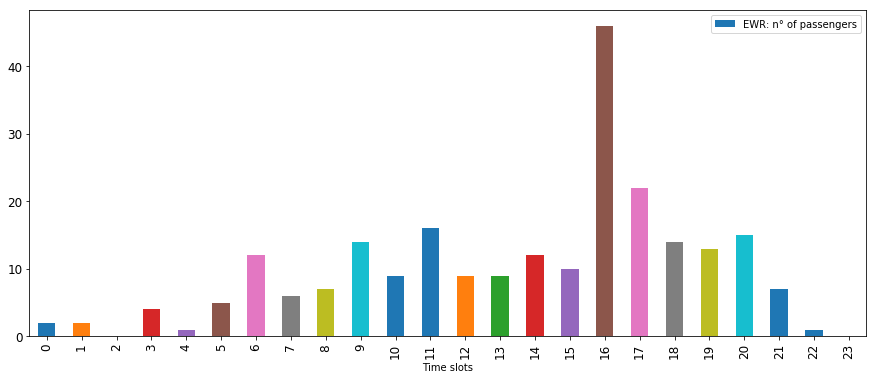

In [21]:
# Plot

barplot = merge.plot(x="Time slots", y="EWR: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

In EWR a clear peak in the number of passengers can be observed around ***16:00***

### January: Queens

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Queens"], columns = ["Queens: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

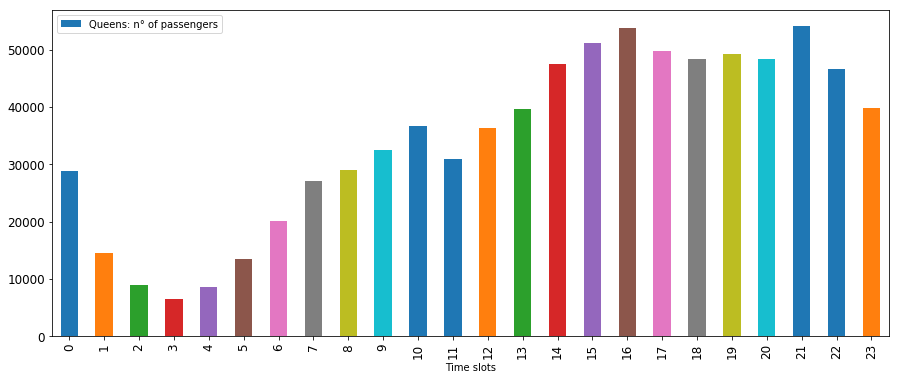

In [23]:
# Plot

barplot = merge.plot(x="Time slots", y="Queens: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

In Queens, we can observe a gradual increase in the number of passengers during the day, similar to that observed in the global NY plot. This time, though, the peak is found aroung ***16:00***

### January: Manhattan

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Manhattan"], columns = ["Manhattan: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

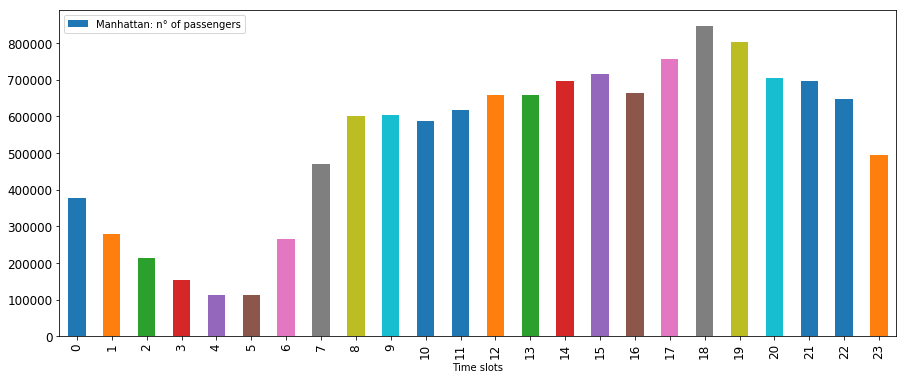

In [25]:
# Plot

barplot = merge.plot(x="Time slots", y="Manhattan: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

In Manhattan, the plot resembles almost indentically the one observed in the global NY graph. This can be easily justified if we take into account the huge number of passengers which start their yellow-taxi trips in Manhattan, and therefore the fact that Manhattan's contribution in the global plot is necessarily the main one.

### January: Staten Island

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Staten Island"], columns = ["Staten Island: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

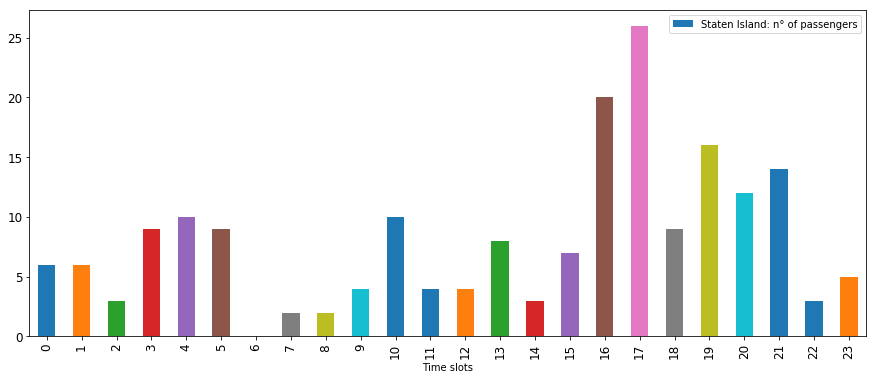

In [27]:
# Plot

barplot = merge.plot(x="Time slots", y="Staten Island: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

In Staten Island, the distribution fo passengers in the different time slots of the day is quite edgy, with sharp increases and sudden decreases, which combine in the overall absence of a clear pattern. However, it's possible to note a distinct increase in the number of passengers around ***16:00 ~ 17:00***.

### January: Bronx

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Bronx"], columns = ["Bronx: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

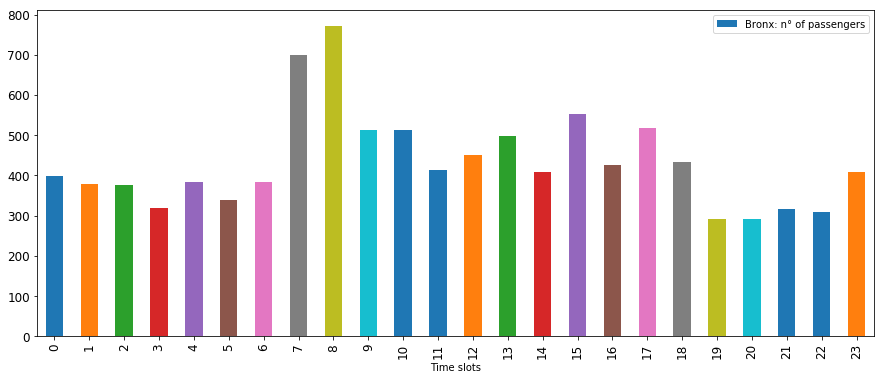

In [29]:
# Plot

barplot = merge.plot(x="Time slots", y="Bronx: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

In Bronx, the plot appears almost flat, with a sharp rise around ***7:00 ~ 8:00*** in the morning.

### January: Brooklyn

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Brooklyn"], columns = ["Brooklyn: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

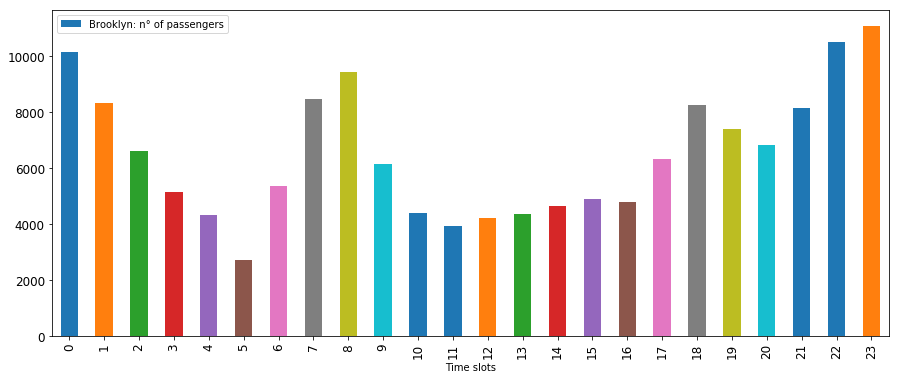

In [31]:
# Plot

barplot = merge.plot(x="Time slots", y="Brooklyn: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

Lastly, in Brooklyn, there are two clear peaks around the first hours of the day ***7:00 ~ 8:00*** and the middle of the night (***22:00 ~ 0:00***)

### February

In [15]:
final_feb = keep_feb.copy()

In [16]:
# format pickup datetime column, leaving only the hours (selected time slots)

final_feb['tpep_pickup_datetime'] = final_feb['tpep_pickup_datetime'].dt.hour

In [17]:
final_feb = final_feb.groupby(['tpep_pickup_datetime','PULocationID'])["passenger_count"].sum()

In [18]:
# count total number of trips for each borough, and for each time slot

# this dictionary contains the count for each borough

overall_count = [0]*24

borough_count = {'EWR': [0]*24, 'Queens': [0]*24, 'Bronx': [0]*24, 'Manhattan': [0]*24, 'Staten Island': [0]*24, 'Brooklyn': [0]*24, 'Unknown': [0]*24}

# for every total count in keep_loc, get the corresponding time slot, and LocationID
# check what borough the location belongs to, and 
# add the count for that location to the correct borough and time slot

for i in range(0, len(final_feb)):
    time_slot = final_feb.index[i][0]
    LocationID = final_feb.index[i][1]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough][int(time_slot)] = borough_count[borough][int(time_slot)] + int(final_feb[time_slot][LocationID])
    
    overall_count[int(time_slot)] = overall_count[int(time_slot)] + int(final_feb[time_slot][LocationID])

del final_feb

### February: NY

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_overallcount = pd.DataFrame(overall_count, columns = ["NY: n° of passengers"])
merge = df_time_slot.join(df_overallcount)
merge

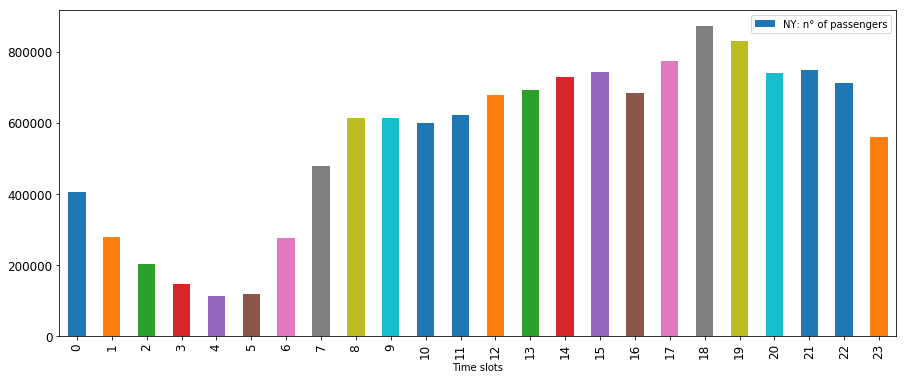

In [20]:
barplot = merge.plot(x="Time slots", y="NY: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### February: EWR

In [ ]:
df_count = pd.DataFrame(borough_count["EWR"], columns = ["EWR: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

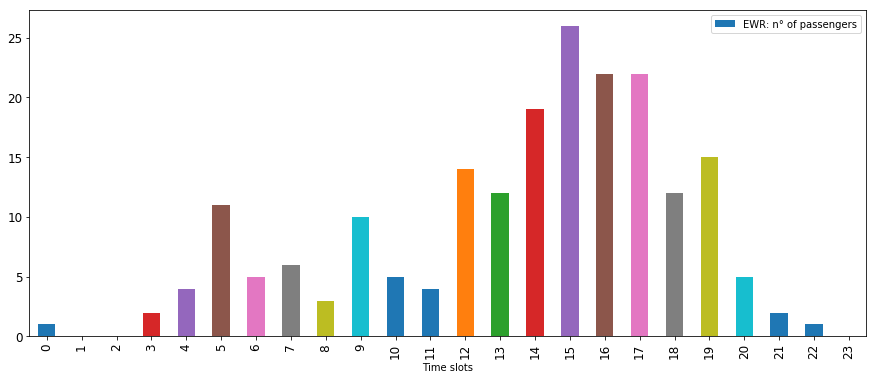

In [22]:
barplot = merge.plot(x="Time slots", y="EWR: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Queens"], columns = ["Queens: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

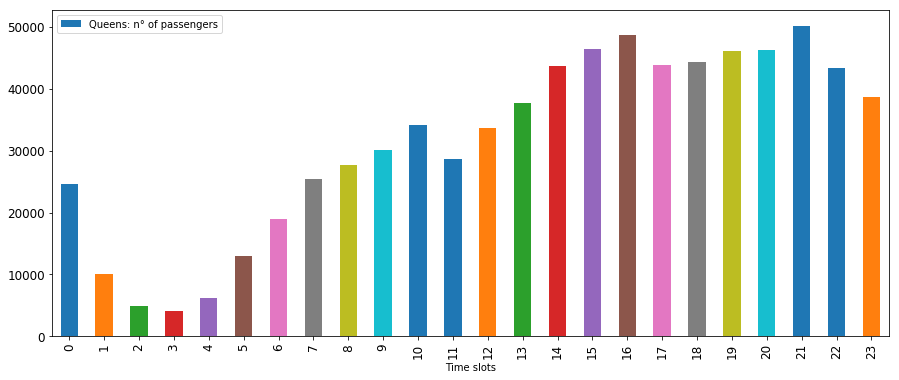

In [24]:


barplot = merge.plot(x="Time slots", y="Queens: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Manhattan"], columns = ["Manhattan: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

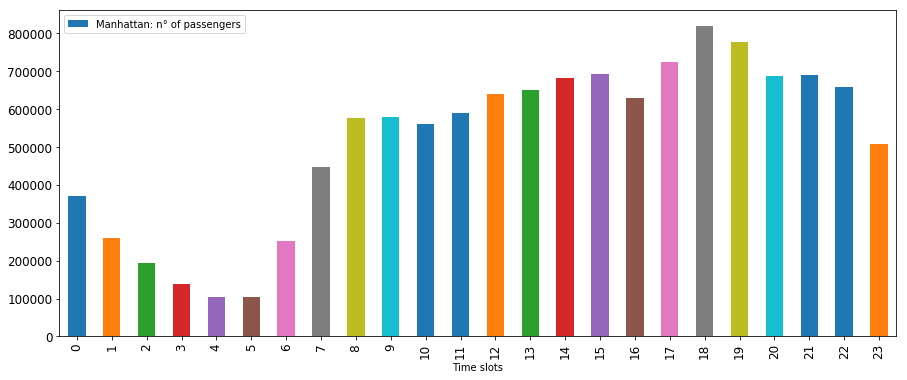

In [26]:


barplot = merge.plot(x="Time slots", y="Manhattan: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Staten Island"], columns = ["Staten Island: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

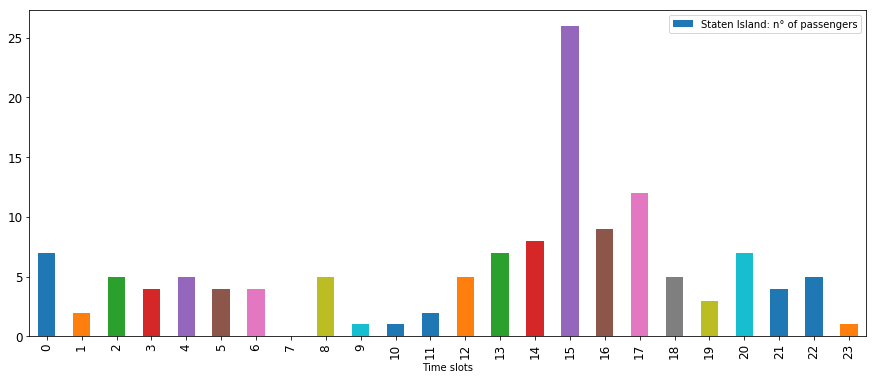

In [28]:


barplot = merge.plot(x="Time slots", y="Staten Island: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Bronx"], columns = ["Bronx: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

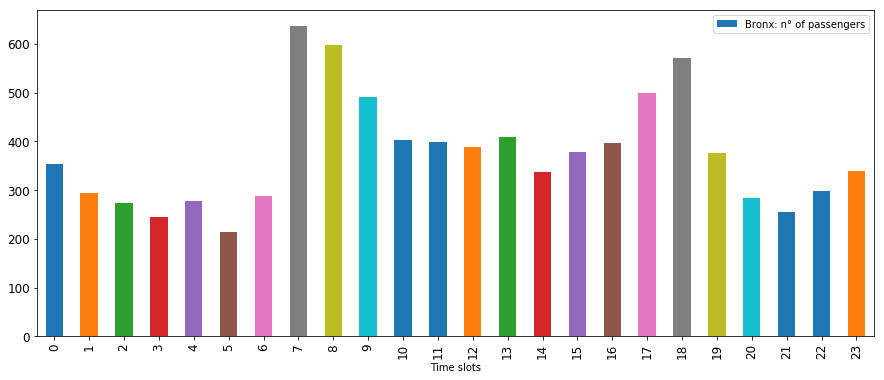

In [30]:
barplot = merge.plot(x="Time slots", y="Bronx: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### February: Brooklyn

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Brooklyn"], columns = ["Brooklyn: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

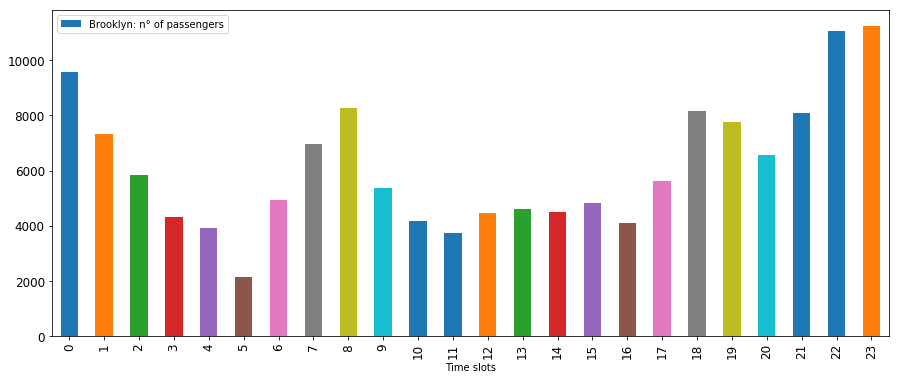

In [32]:


barplot = merge.plot(x="Time slots", y="Brooklyn: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### March

In [5]:
final_mar = keep_mar.copy()

In [ ]:
# format pickup datetime column, leaving only the hours (selected time slots)

final_mar['tpep_pickup_datetime'] = final_mar['tpep_pickup_datetime'].dt.hour
final_mar

In [7]:
final_mar = final_mar.groupby(['tpep_pickup_datetime','PULocationID'])["passenger_count"].sum()

In [8]:
# count total number of trips for each borough, and for each time slot

# this dictionary contains the count for each borough

overall_count = [0]*24

borough_count = {'EWR': [0]*24, 'Queens': [0]*24, 'Bronx': [0]*24, 'Manhattan': [0]*24, 'Staten Island': [0]*24, 'Brooklyn': [0]*24, 'Unknown': [0]*24}

# for every total count in keep_loc, get the corresponding time slot, and LocationID
# check what borough the location belongs to, and 
# add the count for that location to the correct borough and time slot

for i in range(0, len(final_mar)):
    time_slot = final_mar.index[i][0]
    LocationID = final_mar.index[i][1]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough][int(time_slot)] = borough_count[borough][int(time_slot)] + int(final_mar[time_slot][LocationID])
    
    overall_count[int(time_slot)] = overall_count[int(time_slot)] + int(final_mar[time_slot][LocationID])

del final_mar

### March: NY

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_overallcount = pd.DataFrame(overall_count, columns = ["NY: n° of passengers"])
merge = df_time_slot.join(df_overallcount)
merge

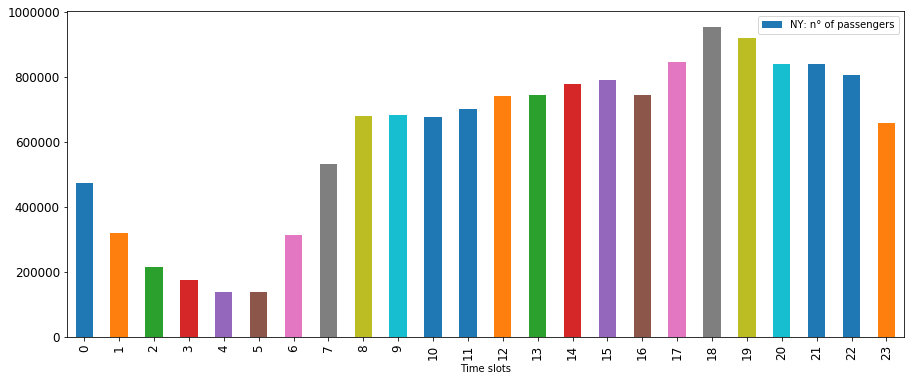

In [11]:
# Plot

barplot = merge.plot(x="Time slots", y="NY: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### March: EWR

In [ ]:
df_count = pd.DataFrame(borough_count["EWR"], columns = ["EWR: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

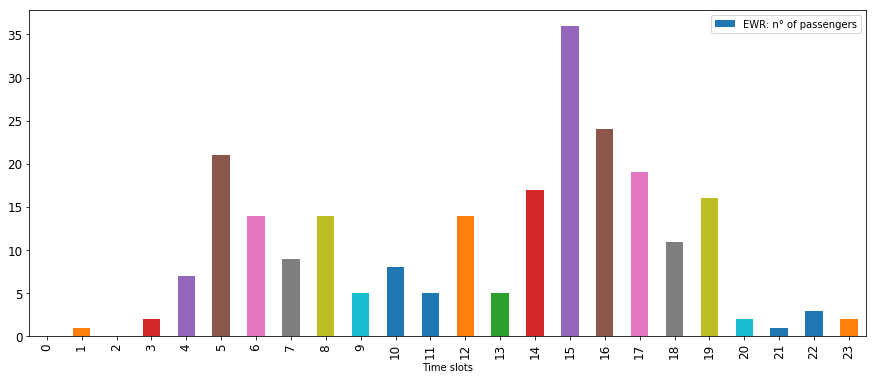

In [13]:
# Plot

barplot = merge.plot(x="Time slots", y="EWR: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### March: Queens

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Queens"], columns = ["Queens: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

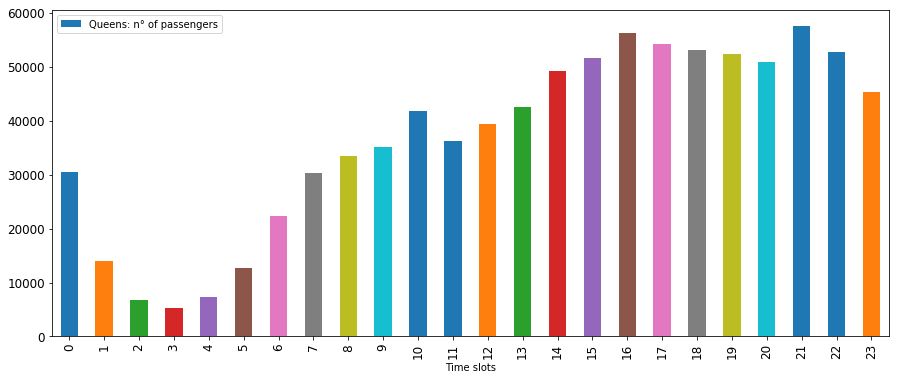

In [15]:
# Plot

barplot = merge.plot(x="Time slots", y="Queens: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### March: Manhattan

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Manhattan"], columns = ["Manhattan: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

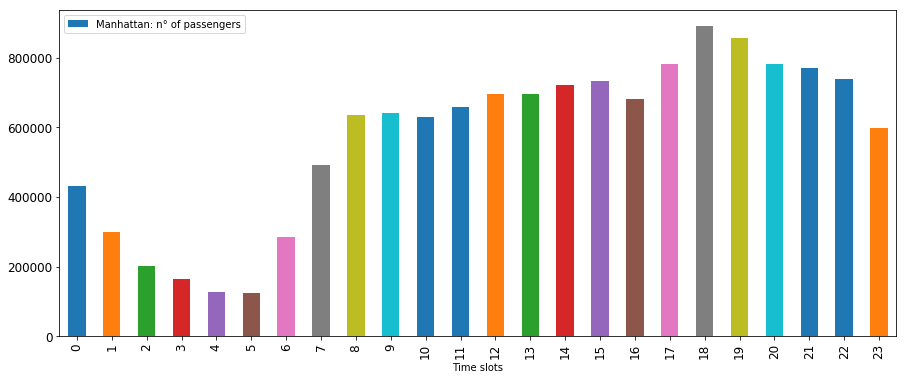

In [17]:
# Plot

barplot = merge.plot(x="Time slots", y="Manhattan: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### March: Staten Island

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Staten Island"], columns = ["Staten Island: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

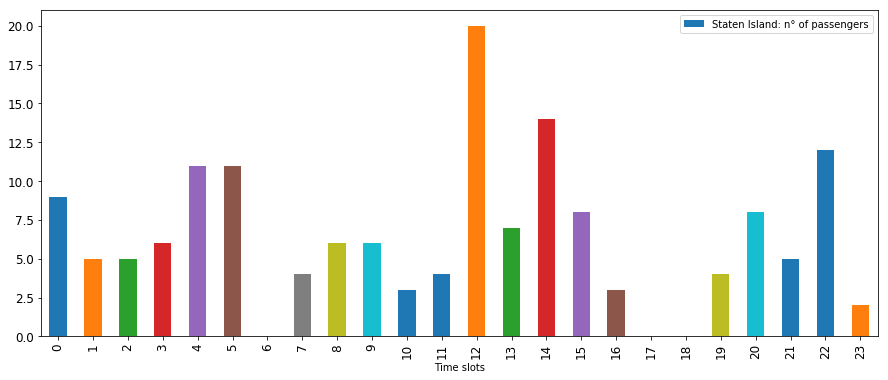

In [19]:
# Plot

barplot = merge.plot(x="Time slots", y="Staten Island: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### March: Bronx

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Bronx"], columns = ["Bronx: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

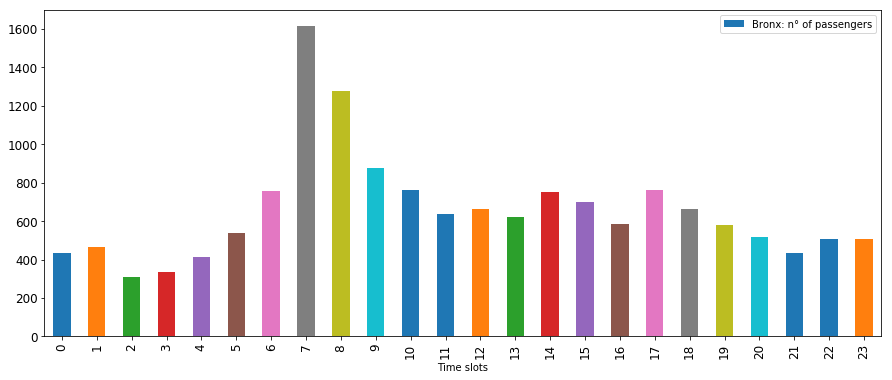

In [21]:
# Plot

barplot = merge.plot(x="Time slots", y="Bronx: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### March: Brooklyn

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Brooklyn"], columns = ["Brooklyn: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

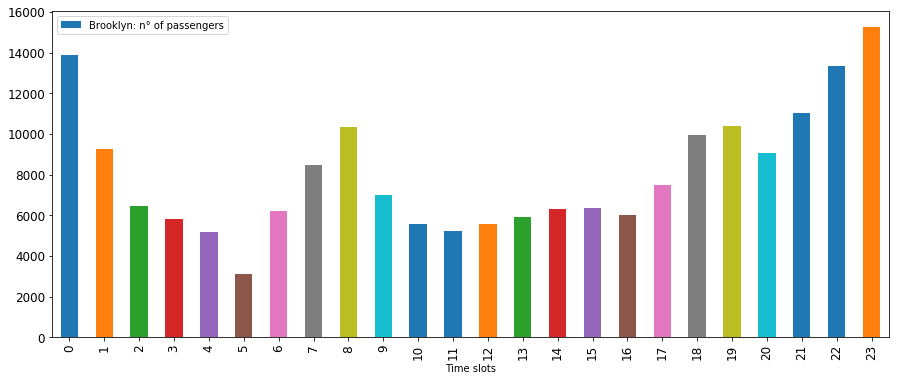

In [25]:
# Plot

barplot = merge.plot(x="Time slots", y="Brooklyn: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### April

In [6]:
final_apr = keep_apr.copy()

In [ ]:
# format pickup datetime column, leaving only the hours (selected time slots)

final_apr['tpep_pickup_datetime'] = final_apr['tpep_pickup_datetime'].dt.hour
final_apr

In [9]:
final_apr = final_apr.groupby(['tpep_pickup_datetime','PULocationID'])["passenger_count"].sum()

In [10]:
# count total number of trips for each borough, and for each time slot

# this dictionary contains the count for each borough

overall_count = [0]*24

borough_count = {'EWR': [0]*24, 'Queens': [0]*24, 'Bronx': [0]*24, 'Manhattan': [0]*24, 'Staten Island': [0]*24, 'Brooklyn': [0]*24, 'Unknown': [0]*24}

# for every total count in keep_may_loc, get the corresponding time slot, and LocationID
# check what borough the location belongs to, and 
# add the count for that location to the correct borough and time slot

for i in range(0, len(final_apr)):
    time_slot = final_apr.index[i][0]
    LocationID = final_apr.index[i][1]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough][int(time_slot)] = borough_count[borough][int(time_slot)] + int(final_apr[time_slot][LocationID])
    
    overall_count[int(time_slot)] = overall_count[int(time_slot)] + int(final_apr[time_slot][LocationID])

del final_apr

### April: NY

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_overallcount = pd.DataFrame(overall_count, columns = ["NY: n° of passengers"])
merge = df_time_slot.join(df_overallcount)
merge

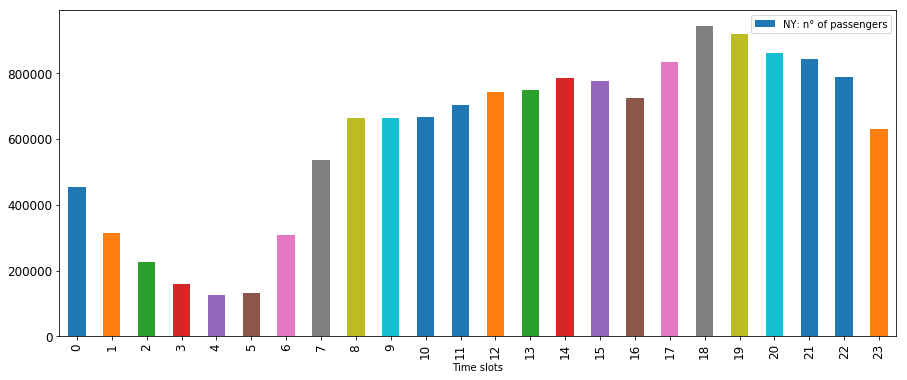

In [13]:
# Plot

barplot = merge.plot(x="Time slots", y="NY: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### April: EWR

In [ ]:
df_count = pd.DataFrame(borough_count["EWR"], columns = ["EWR: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

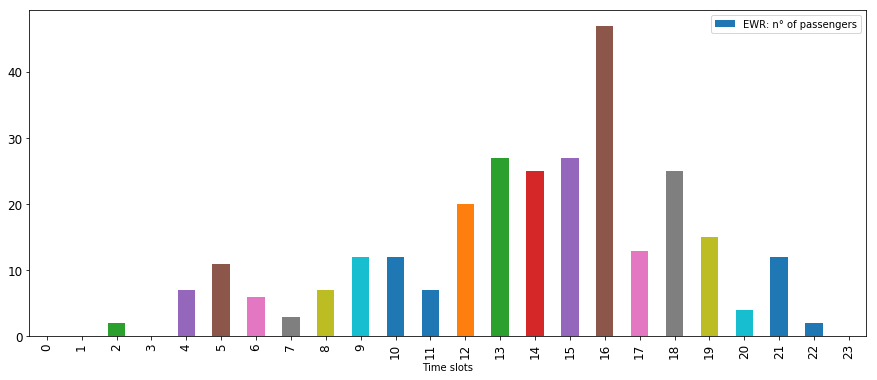

In [15]:
# Plot

barplot = merge.plot(x="Time slots", y="EWR: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### April: Queens

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Queens"], columns = ["Queens: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

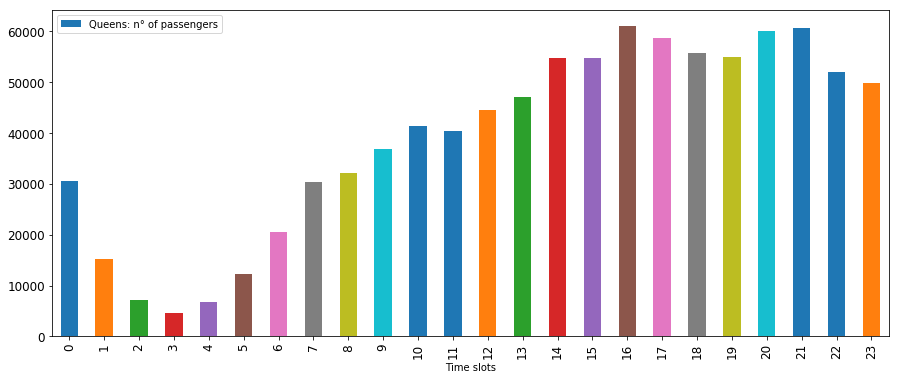

In [17]:
# Plot

barplot = merge.plot(x="Time slots", y="Queens: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### April: Manhattan

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Manhattan"], columns = ["Manhattan: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

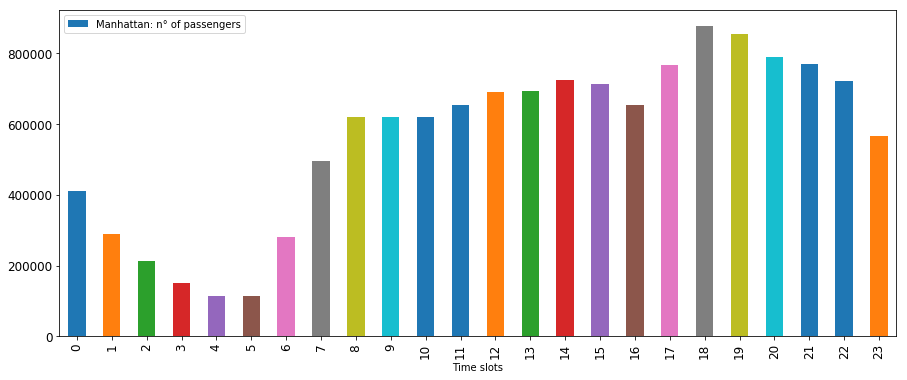

In [19]:
# Plot

barplot = merge.plot(x="Time slots", y="Manhattan: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### April: Staten Island

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Staten Island"], columns = ["Staten Island: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

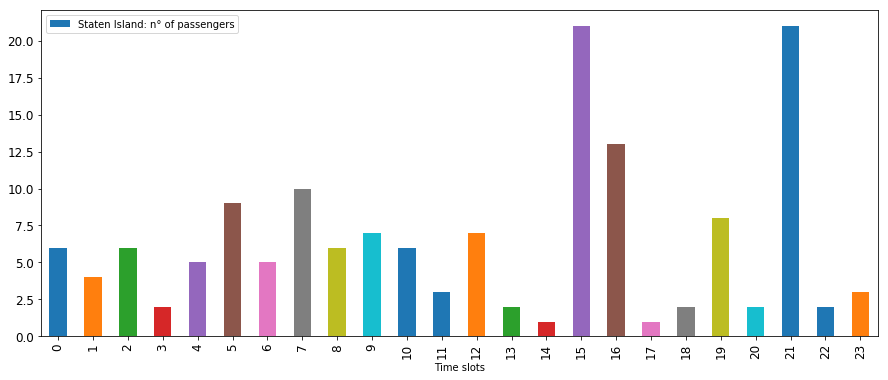

In [21]:
# Plot

barplot = merge.plot(x="Time slots", y="Staten Island: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### April: Bronx

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Bronx"], columns = ["Bronx: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

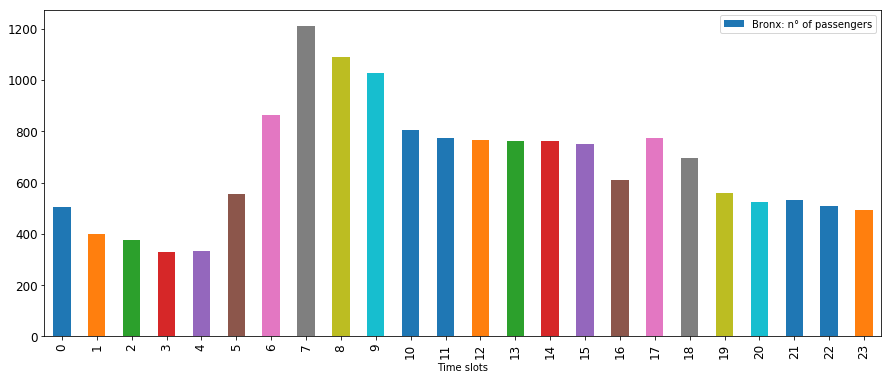

In [23]:
# Plot

barplot = merge.plot(x="Time slots", y="Bronx: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### April: Brooklyn

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Brooklyn"], columns = ["Brooklyn: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

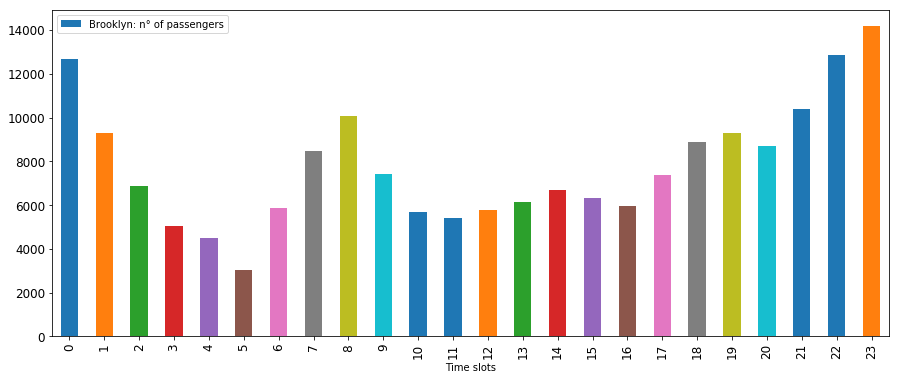

In [25]:
# Plot

barplot = merge.plot(x="Time slots", y="Brooklyn: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### May

In [5]:
final_may = keep_may.copy()

In [7]:
# format pickup datetime column, leaving only the hours (selected time slots)

final_may['tpep_pickup_datetime'] = final_may['tpep_pickup_datetime'].dt.hour

In [8]:
final_may = final_may.groupby(['tpep_pickup_datetime','PULocationID'])["passenger_count"].sum()

In [9]:
# count total number of trips for each borough, and for each time slot

# this dictionary contains the count for each borough

overall_count = [0]*24

borough_count = {'EWR': [0]*24, 'Queens': [0]*24, 'Bronx': [0]*24, 'Manhattan': [0]*24, 'Staten Island': [0]*24, 'Brooklyn': [0]*24, 'Unknown': [0]*24}

# for every total count in keep_loc, get the corresponding time slot, and LocationID
# check what borough the location belongs to, and 
# add the count for that location to the correct borough and time slot

for i in range(0, len(final_may)):
    time_slot = final_may.index[i][0]
    LocationID = final_may.index[i][1]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough][int(time_slot)] = borough_count[borough][int(time_slot)] + int(final_may[time_slot][LocationID])

    overall_count[int(time_slot)] = overall_count[int(time_slot)] + int(final_may[time_slot][LocationID])

del final_may

### May: NY

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_overallcount = pd.DataFrame(overall_count, columns = ["NY: n° of passengers"])
merge = df_time_slot.join(df_overallcount)
merge

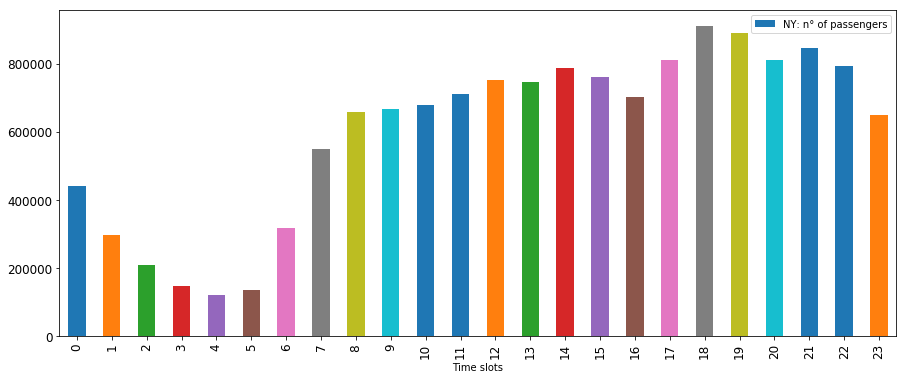

In [14]:
# Plot

barplot = merge.plot(x="Time slots", y="NY: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### May: EWR

In [ ]:
df_count = pd.DataFrame(borough_count["EWR"], columns = ["EWR: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

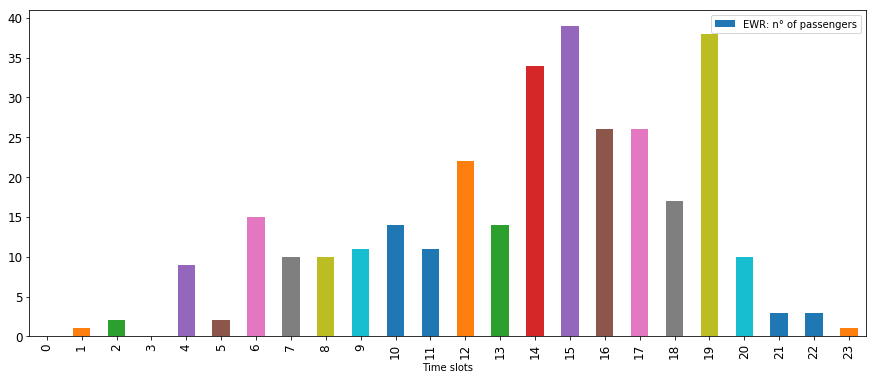

In [16]:
# Plot

barplot = merge.plot(x="Time slots", y="EWR: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### May: Queens

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Queens"], columns = ["Queens: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

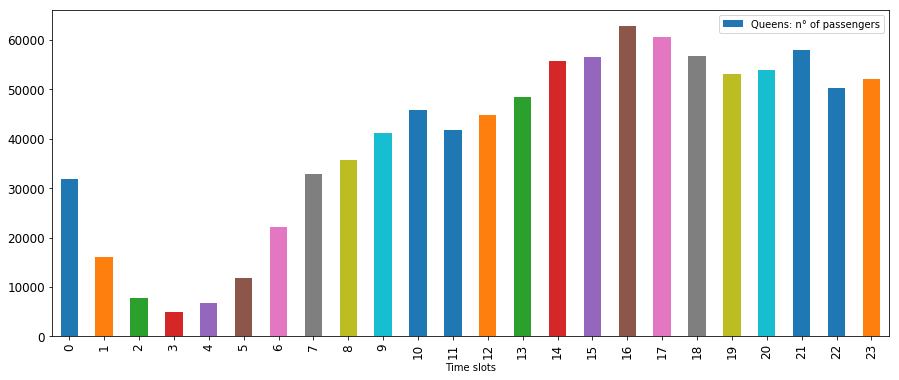

In [18]:
# Plot

barplot = merge.plot(x="Time slots", y="Queens: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### May: Manhattan

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Manhattan"], columns = ["Manhattan: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

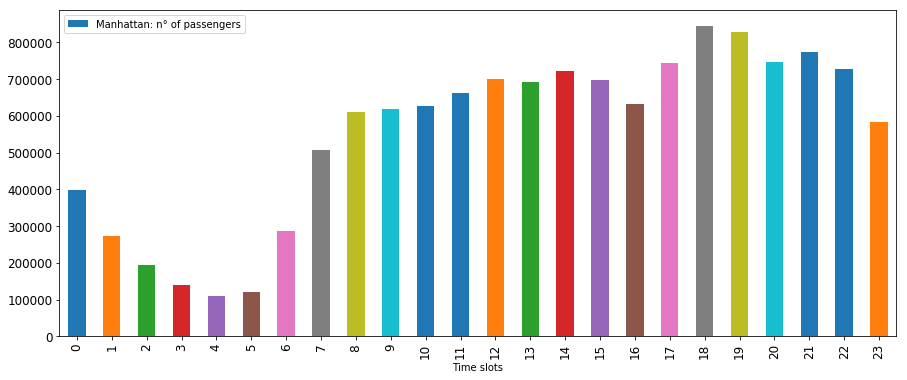

In [20]:
# Plot

barplot = merge.plot(x="Time slots", y="Manhattan: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### May: Staten Island

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Staten Island"], columns = ["Staten Island: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

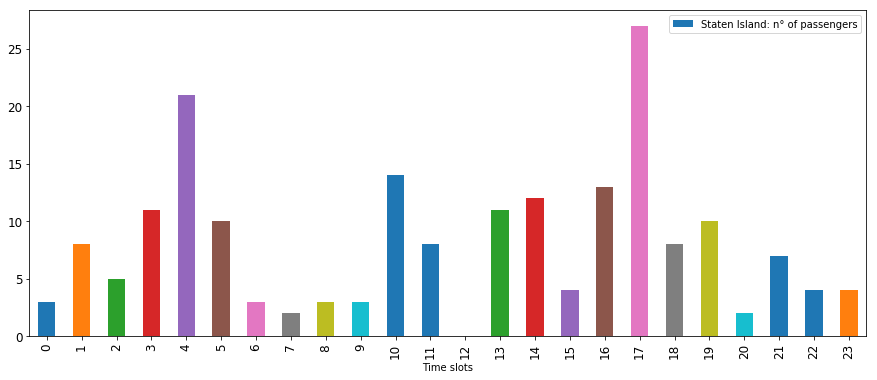

In [22]:
# Plot

barplot = merge.plot(x="Time slots", y="Staten Island: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### May: Bronx

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Bronx"], columns = ["Bronx: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

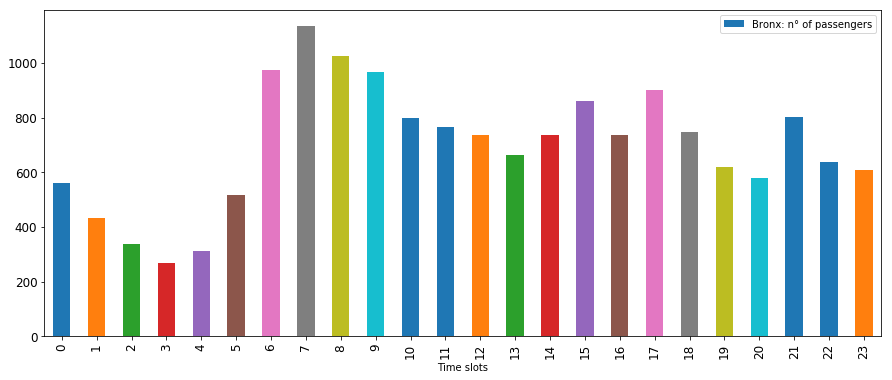

In [24]:
# Plot

barplot = merge.plot(x="Time slots", y="Bronx: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### May: Brooklyn

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Brooklyn"], columns = ["Brooklyn: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

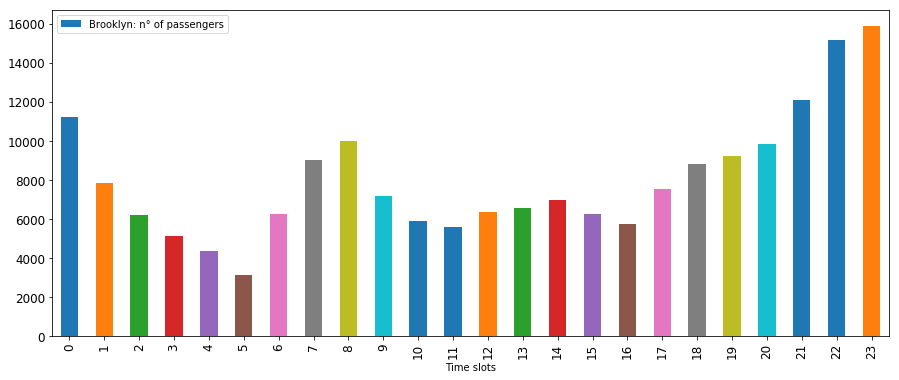

In [26]:
# Plot

barplot = merge.plot(x="Time slots", y="Brooklyn: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### June

In [5]:
final_jun = keep_jun.copy()

In [ ]:
# format pickup datetime column, leaving only the hours (selected time slots)

final_jun['tpep_pickup_datetime'] = final_jun['tpep_pickup_datetime'].dt.hour
final_jun

In [9]:
# remove dropoff datetime column

final_jun = final_jun.drop(labels = "tpep_dropoff_datetime", axis = 1)

In [10]:
final_jun = final_jun.groupby(['tpep_pickup_datetime','PULocationID'])["passenger_count"].sum()

In [11]:
# count total number of trips for each borough, and for each time slot

# this dictionary contains the count for each borough

overall_count = [0]*24

borough_count = {'EWR': [0]*24, 'Queens': [0]*24, 'Bronx': [0]*24, 'Manhattan': [0]*24, 'Staten Island': [0]*24, 'Brooklyn': [0]*24, 'Unknown': [0]*24}

# for every total count in keep_loc, get the corresponding time slot, and LocationID
# check what borough the location belongs to, and 
# add the count for that location to the correct borough and time slot

for i in range(0, len(final_jun)):
    time_slot = final_jun.index[i][0]
    LocationID = final_jun.index[i][1]
    for borough in dfdict:
        if LocationID in dfdict[borough]:
            borough_count[borough][int(time_slot)] = borough_count[borough][int(time_slot)] + int(final_jun[time_slot][LocationID])

    overall_count[int(time_slot)] = overall_count[int(time_slot)] + int(final_jun[time_slot][LocationID])

del final_jun

### June: NY

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_overallcount = pd.DataFrame(overall_count, columns = ["NY: n° of passengers"])
merge = df_time_slot.join(df_overallcount)
merge

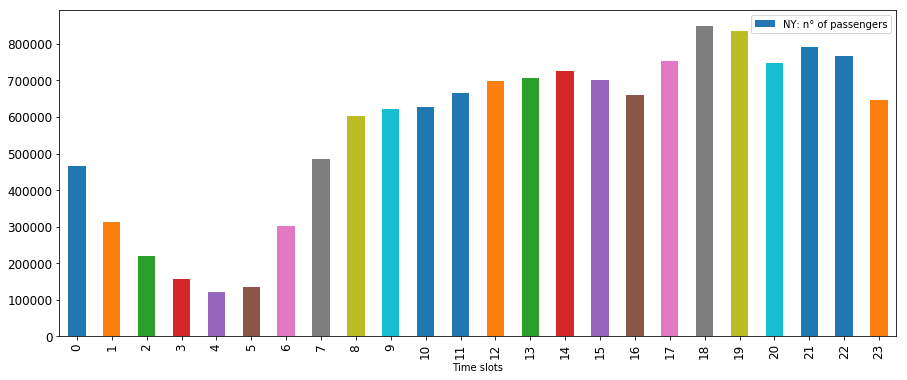

In [14]:
barplot = merge.plot(x="Time slots", y="NY: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### June: EWR

In [ ]:
df_count = pd.DataFrame(borough_count["EWR"], columns = ["EWR: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

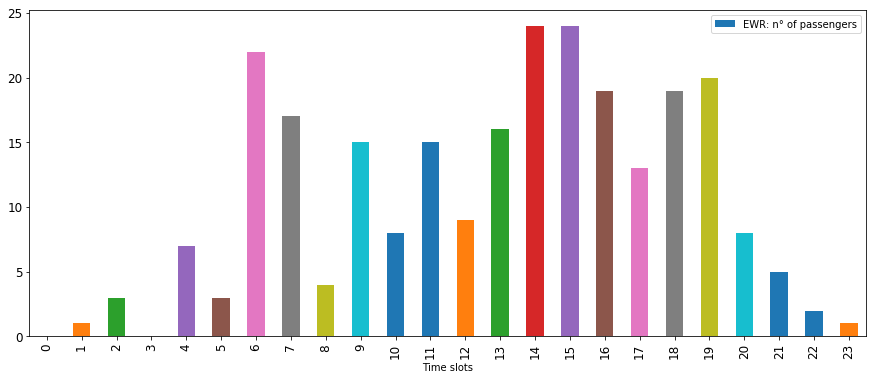

In [16]:
# Plot

barplot = merge.plot(x="Time slots", y="EWR: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### June: Queens

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Queens"], columns = ["Queens: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

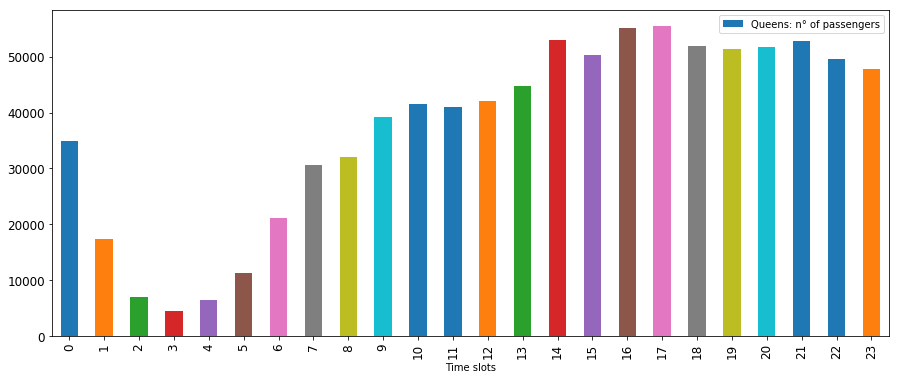

In [18]:
# Plot

barplot = merge.plot(x="Time slots", y="Queens: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### June: Manhattan

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Manhattan"], columns = ["Manhattan: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

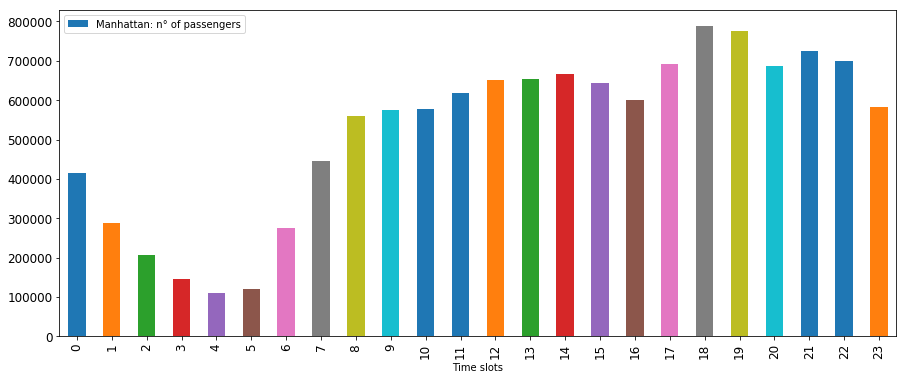

In [20]:
# Plot

barplot = merge.plot(x="Time slots", y="Manhattan: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### June: Staten Island

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Staten Island"], columns = ["Staten Island: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

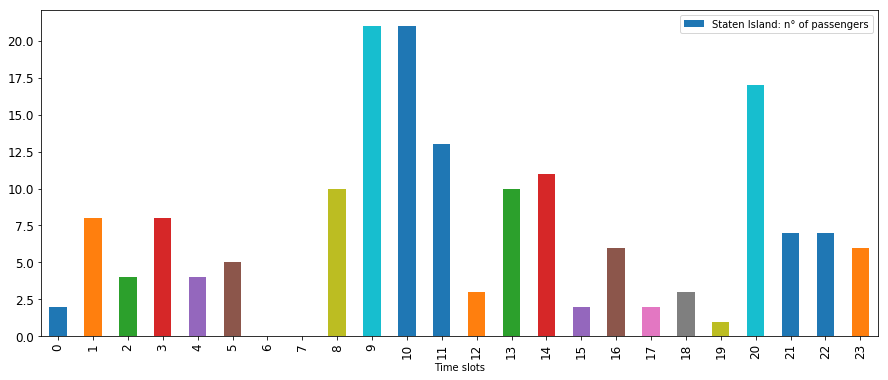

In [22]:
# Plot

barplot = merge.plot(x="Time slots", y="Staten Island: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### June: Bronx

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Bronx"], columns = ["Bronx: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

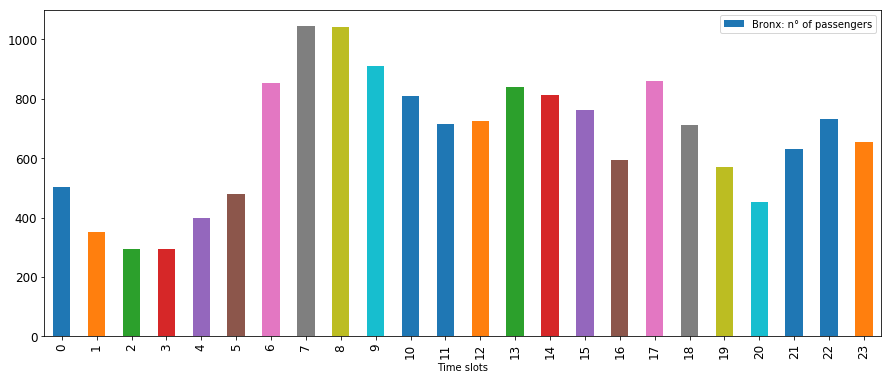

In [24]:
# Plot

barplot = merge.plot(x="Time slots", y="Bronx: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

### June: Brooklyn

In [ ]:
df_time_slot = pd.DataFrame(list(range(24)), columns = ["Time slots"])
df_count = pd.DataFrame(borough_count["Brooklyn"], columns = ["Brooklyn: n° of passengers"])
merge = df_time_slot.join(df_count)
merge

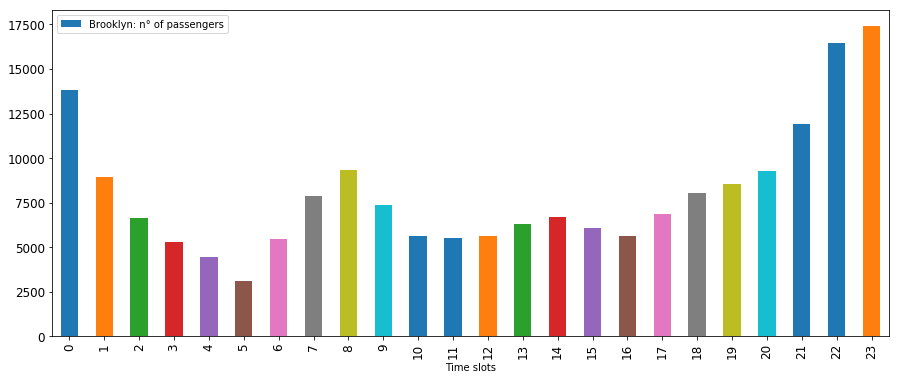

In [26]:
# Plot

barplot = merge.plot(x="Time slots", y="Brooklyn: n° of passengers", kind='bar', figsize = (15, 6), fontsize = 12)

# RQ3

***Do all the trips last the same?***

We have to create a plot for each borough and for NYC. Let's put our attention on the distribution of trip's duration.

### Analysis for each borough

First of all, we have to modify our *taxi zone dictionary* (dfdict), in which there are all the *LocationID* and *Boroughs*. 

We reverse dictionary items with dictionary keys through a *for loop*:

In [16]:
dfdict2 = {}
for k,v in dfdict.items():
    for x in v:
        dfdict2.setdefault(x,[]).append(k)

Now, we decide to consider the borough of departure (*PULocationID*) for running our analysis; then, for each month, we replace *PULocationID* with the name of the corresponding *Borough*. After that, we create six variables (*jan, feb, mar, apr, may, jun*), each of which corresponds to a DataFrame with two columns:
- **PULocationID** (the name of borough);
- **trip_duration** (previously calculated).

In [17]:
keep_jan["PULocationID"] = keep_jan["PULocationID"].replace(dfdict2)
jan = keep_jan[['PULocationID','trip_duration_january']]
jan = jan.rename(columns = {'trip_duration_january':'trip_duration'})

In [18]:
keep_feb["PULocationID"] = keep_feb["PULocationID"].replace(dfdict2)
feb = keep_feb[['PULocationID','trip_duration_february']]
feb = feb.rename(columns = {'trip_duration_february':'trip_duration'})

In [19]:
keep_mar["PULocationID"] = keep_mar["PULocationID"].replace(dfdict2)
mar = keep_mar[['PULocationID','trip_duration_march']]
mar = mar.rename(columns = {'trip_duration_march':'trip_duration'})

In [20]:
keep_apr["PULocationID"] = keep_apr["PULocationID"].replace(dfdict2)
apr = keep_apr[['PULocationID','trip_duration_april']]
apr = apr.rename(columns = {'trip_duration_april':'trip_duration'})

In [21]:
keep_may["PULocationID"] = keep_may["PULocationID"].replace(dfdict2)
may = keep_may[['PULocationID','trip_duration_may']]
may = may.rename(columns = {'trip_duration_may':'trip_duration'})

In [22]:
keep_jun["PULocationID"] = keep_jun["PULocationID"].replace(dfdict2)
jun = keep_jun[['PULocationID','trip_duration_june']]
jun = jun.rename(columns = {'trip_duration_june':'trip_duration'})

In this step we concatenate the six variables. We obtain ***zone***: a DataFrame with all the months.

In [23]:
zone = pd.concat([jan, feb, mar, apr, may, jun], ignore_index=True)

At this point, we're able to create the ***plot*** of each borough.

The first step is extract (through *groupby*) each borough from *zone*; then, drop the *PULocationID* column and analyse only the values contained in *trip_duration* column. To obtain a clear plot we create intervals of *trip_duration* (each interval = 5 min). 

After that, we count how many trips there are for each interval of trip's duration.

#### EWR

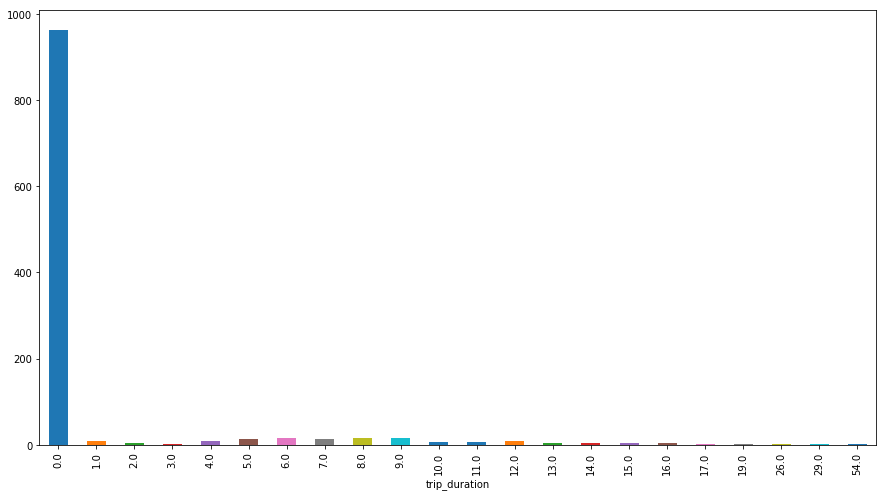

In [31]:
ewr = zone.groupby(zone['PULocationID']).get_group("EWR")

ewr = ewr.drop(labels = 'PULocationID', axis = 1)

# group the trip durations in intervals of 5 minutes 
# i.e. interval 0: (0 ~ 5 minutes), interval 1: (5 ~ 10 minutes), interval 2: (10 ~ 15 minutes), etc.
ewr['trip_duration'] = np.floor(ewr['trip_duration']/5)
ewr = ewr.groupby(ewr['trip_duration']).size()

barplot = ewr.plot(use_index = True, y = 'trip_duration', kind = "bar", figsize = (15, 8))

For EWR (the Newark airport) we can clearly observe that the majority of taxi's trips is in the first interval: from 0 to 5 minutes. 

The other bars have the same height.

#### Queens

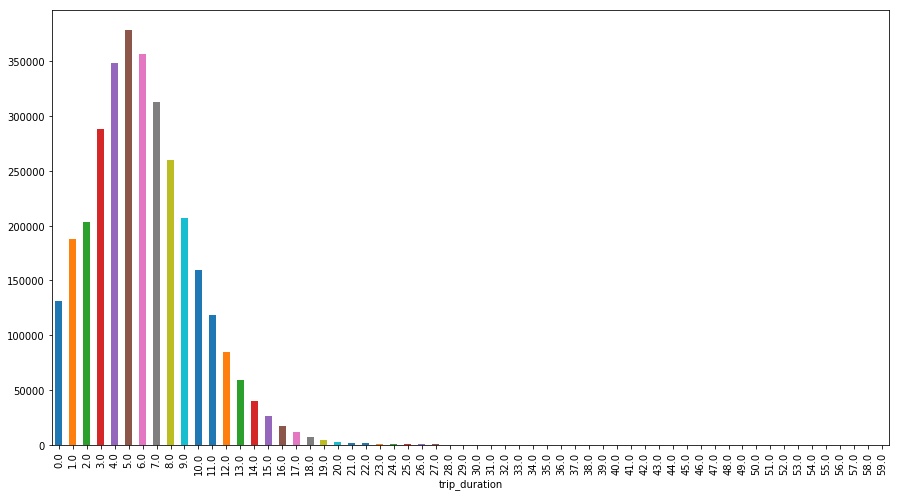

In [25]:
queens = zone.groupby(zone['PULocationID']).get_group("Queens")

queens = queens.drop(labels = 'PULocationID', axis = 1)

queens['trip_duration'] = np.floor(queens['trip_duration']/5)
queens = queens.groupby(queens['trip_duration']).size()

barplot = queens.plot(use_index = True, y = 'trip_duration', kind = "bar", figsize = (15, 8))

Instead, in the Queens district we can observe that the number of trips increases until the sixth interval (25 - 30 min); then begins to decrease.

#### Bronx

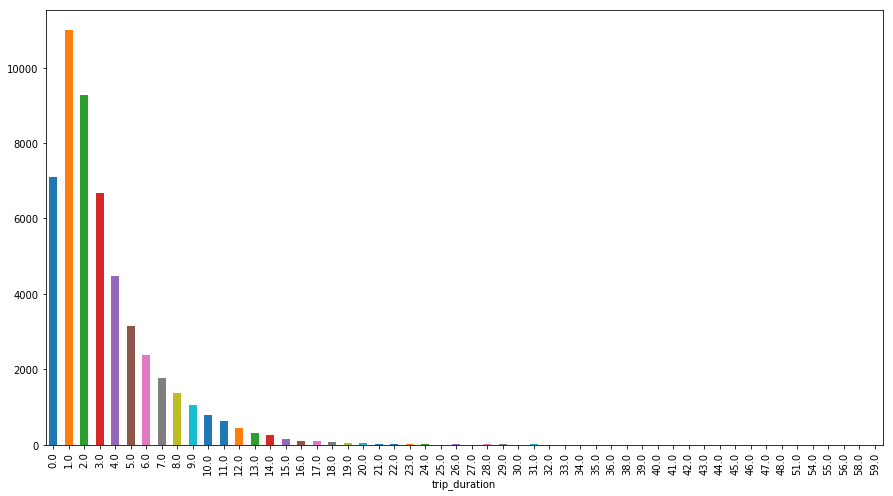

In [26]:
bronx = zone.groupby(zone['PULocationID']).get_group("Bronx")

bronx = bronx.drop(labels = 'PULocationID', axis = 1)

bronx['trip_duration'] = np.floor(bronx['trip_duration']/5)
bronx = bronx.groupby(bronx['trip_duration']).size()

barplot = bronx.plot(use_index = True, y = 'trip_duration', kind = "bar", figsize = (15, 8))

In Bronx district we have the same trend found in Queens, but the highest trip's duration interval is the second: from 5 to 10 minutes.

#### Manhattan

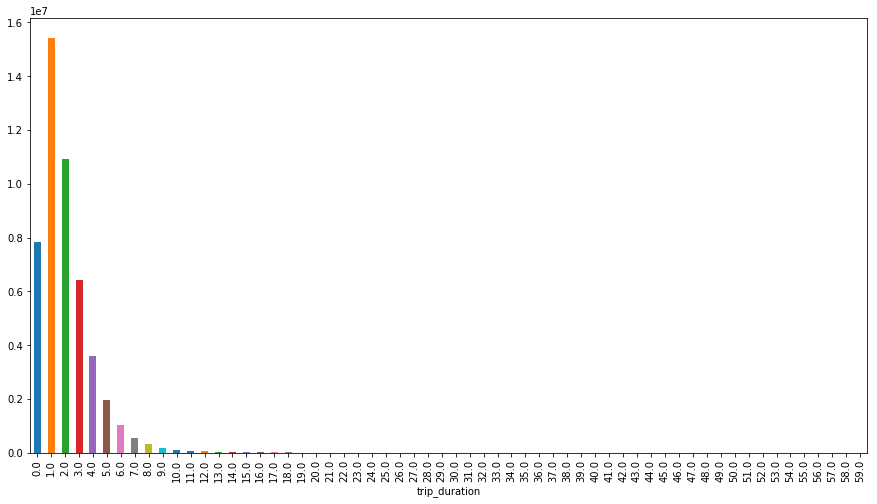

In [27]:
manhattan = zone.groupby(zone['PULocationID']).get_group("Manhattan")

manhattan = manhattan.drop(labels = 'PULocationID', axis = 1)

manhattan['trip_duration'] = np.floor(manhattan['trip_duration']/5)
manhattan = manhattan.groupby(manhattan['trip_duration']).size()

barplot = manhattan.plot(use_index = True, y = 'trip_duration', kind = "bar", figsize = (15, 8))

We observe in Manhattan the same trend of Bronx district.

#### Staten Island

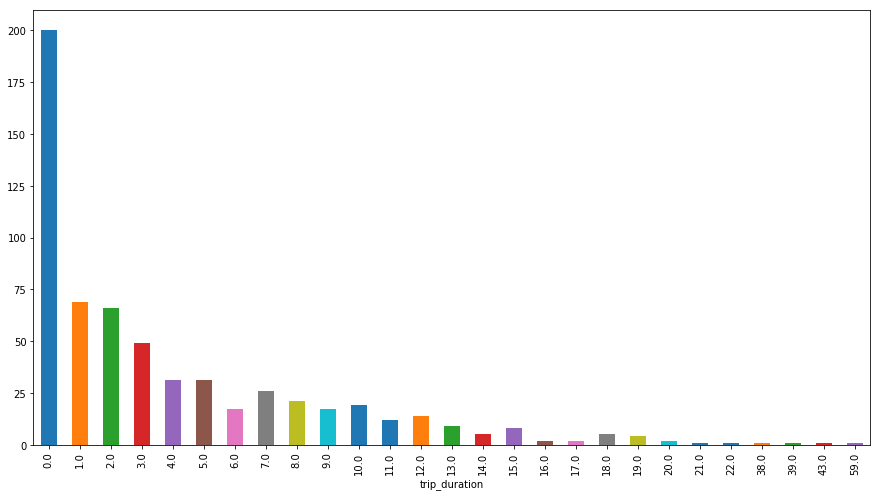

In [28]:
statenisland = zone.groupby(zone['PULocationID']).get_group("Staten Island")

statenisland = statenisland.drop(labels = 'PULocationID', axis = 1)

statenisland['trip_duration'] = np.floor(statenisland['trip_duration']/5)
statenisland = statenisland.groupby(statenisland['trip_duration']).size()

barplot = statenisland.plot(use_index = True, y = 'trip_duration', kind = "bar", figsize = (15, 8))

In Staten Island district we notices that the bars of the plot are larger. Infact, in this borough, we've found a smaller numbers of trips, due to its position. 

Staten Island is separated from the other boroughs by the Verrazzano Bridge. It is the least populated of NYC districs. The highest interval is the first (0 - 5 min).

#### Brooklyn

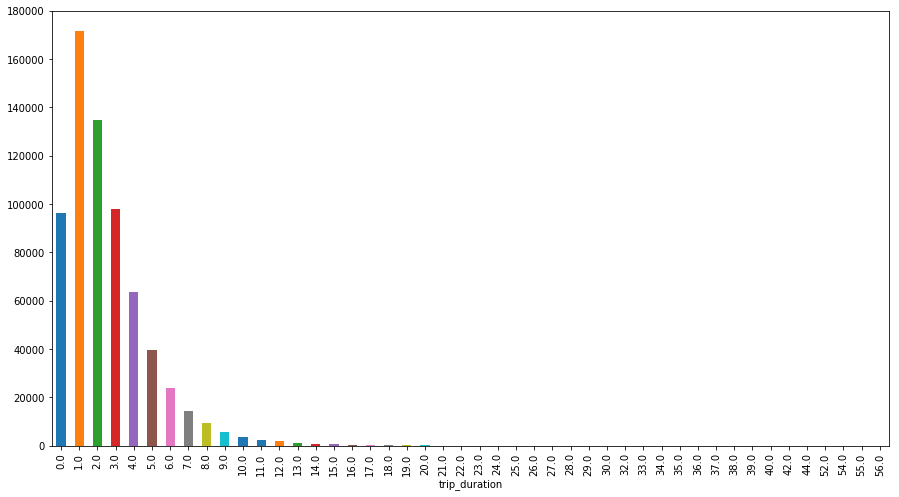

In [29]:
brooklyn = zone.groupby(zone['PULocationID']).get_group("Brooklyn")

brooklyn = brooklyn.drop(labels = 'PULocationID', axis = 1)

brooklyn['trip_duration'] = np.floor(brooklyn['trip_duration']/5)
brooklyn = brooklyn.groupby(brooklyn['trip_duration']).size()

barplot = brooklyn.plot(use_index = True, y = 'trip_duration', kind = "bar", figsize = (15, 8))

Lastly, we observe for Brooklyn the same trend of Bronx and Manhattan district.

### NYC

Also, RQ3 question asks the plot of trip's duration for NYC. We have used the same procedure performed above, but for NYC we don't group by borough, obviously.

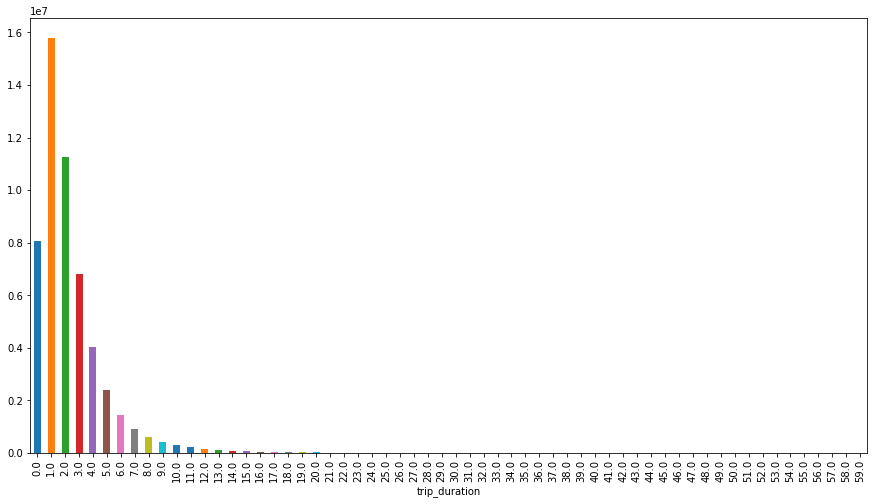

In [30]:
NYC = zone.drop(labels = 'PULocationID', axis = 1)

NYC['trip_duration'] = np.floor(NYC['trip_duration']/5)
NYC = NYC.groupby(NYC['trip_duration']).size()

barplot = NYC.plot(use_index = True, y = 'trip_duration', kind = "bar", figsize = (15, 8))

For NYC we can observe that the highest trip's duration interval is the second. The majority of taxi's trips last 5 - 10 minutes. Then, the bars start to decrease.

# RQ4

***What is the most common way of payments?***

Our next goal is to find out whether the ***method of payment*** is correlated with the borough where the taxi trip starts. First of all, we are going to compute the number of payments by any method for every borough, and plot it in a bar graph for an immediate comparison.

Then, we want to make our impressions more quantitative and go for a global analysis of the hypotetical correlation between payment type and the borough.

In order to do this, we are going to compute the $\chi^2$ test, taking into account essentially two different payment methods (***1: Credit card***, ***2: Cash***). For completeness, we include in the analysis two further possibilities (***3: No charge***, ***4: Dispute***). 

In the test, the ***null hypothesis*** $H_0$ (i.e. the absence of a correlation between the borough and the payment method) is tested against the ***alternate hypothesis*** $H_1$ (i.e. the existence of a correlation).

The $p$-value will tell us, in the end, if the null hypothesis must be accepted or rejected, assuming a significance level of $0.05$.

In this exercise we are going to replace the ***passenger_count*** column with ***payment_type*** column when loading the dataset.

In [7]:
jan = keep_jan[['payment_type', 'PULocationID']]
feb = keep_feb[['payment_type', 'PULocationID']]
mar = keep_mar[['payment_type', 'PULocationID']]
apr = keep_apr[['payment_type', 'PULocationID']]
may = keep_may[['payment_type', 'PULocationID']]
jun = keep_jun[['payment_type', 'PULocationID']]

The following command is used to blend the datasets corresponding to the six different months in a single dataframe which covers the whole sequence.

In [ ]:
final_yr = pd.concat([jan, feb, mar, apr, may, jun], ignore_index=True)
final_yr

In [10]:
# merge with taxi lookup by location id key to get borough.

final_yr = df.set_index('LocationID').join(final_yr.set_index('PULocationID'))

In [11]:
# Find out what is the most common way of payments

counts1 = final_yr['payment_type'].value_counts().to_dict()
counts1

{1.0: 36705257, 2.0: 15527120, 3.0: 231302, 4.0: 66883}

It appears that the preferred method to pay taxi trips is the use of a credit card, even though cash payments seem to occur with discrete frequency. It's also interesting to note a certain number of trips where the run has not been charged.

In [12]:
final_yr['n° of payments'] = 1

In [13]:
# Discover the way payments are executed in each borough
# initially, set that counter to 1
group_data = final_yr
group_data = final_yr.groupby(['payment_type','Borough']).sum() # sum function

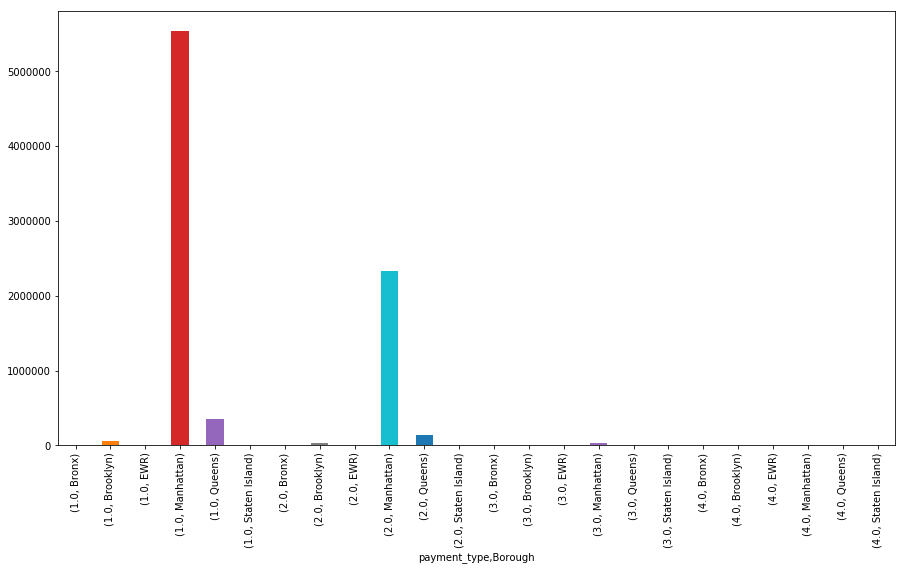

In [79]:
group_NY = group_data["n° of payments"]
group_NY.columns = ["NY: n° of payments"]
barplot = group_NY.plot(use_index = True, y = "NY: n° of payments", kind = "bar", figsize = (15, 8))

In the plot above, we observe how the number of payments by different means varies in the different boroughs. The highest number of payments observed, for taxi trips, is that by credit cards in Manhattan, followed by the payments with cash (we recall that Manhattan has the highest number of taxi pickups)

In [15]:
group_data = group_data.groupby(['Borough'])

### EWR

In [16]:
group_ewr = group_data.get_group('EWR')
group_ewr

,,n° of payments
payment_type,Borough,
1.0,EWR,835
2.0,EWR,161
3.0,EWR,87
4.0,EWR,15


In [17]:
group_ewr.index = ["Credit card", "Cash", "No charge", "Dispute"]
group_ewr

,n° of payments
Credit card,835
Cash,161
No charge,87
Dispute,15


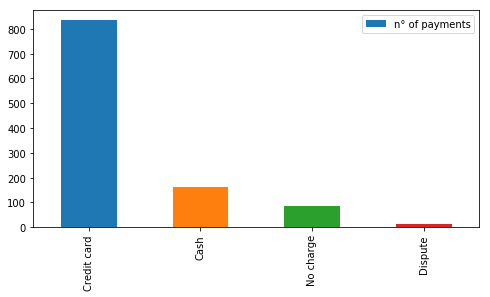

In [18]:
barplot = group_ewr.plot(use_index = True, y = "n° of payments", kind = "bar", figsize = (8, 4))

In the EWR borough, the number of payments by credit card appears to be quite higher then that of the payment by cash. It's also interesting to note how the "no charge" scenario appears to have a discrete number of occurrences as well.

### Queens

In [19]:
group_queens = group_data.get_group('Queens')
group_queens

,,n° of payments
payment_type,Borough,
1.0,Queens,2238842
2.0,Queens,939758
3.0,Queens,24976
4.0,Queens,6859


In [20]:
group_queens.index = ["Credit card", "Cash", "No charge", "Dispute"]
group_queens

,n° of payments
Credit card,2238842
Cash,939758
No charge,24976
Dispute,6859


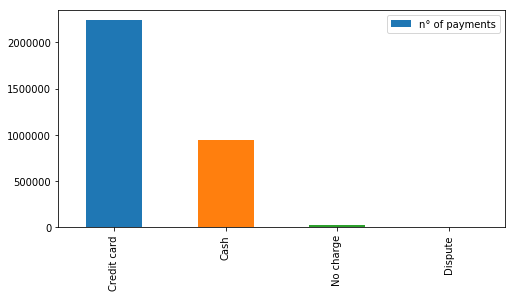

In [21]:
barplot = group_queens.plot(use_index = True, y = "n° of payments", kind = "bar", figsize = (8, 4))

Queens apparently shares the dominance of payments by credit card already observed in EWR, while cash seems to be a common method of payment as well.

### Manhattan

In [22]:
group_manhattan = group_data.get_group('Manhattan')
group_manhattan

,,n° of payments
payment_type,Borough,
1.0,Manhattan,34003374
2.0,Manhattan,14337978
3.0,Manhattan,199272
4.0,Manhattan,58170


In [23]:
group_manhattan.index = ["Credit card", "Cash", "No charge", "Dispute"]
group_manhattan

,n° of payments
Credit card,34003374
Cash,14337978
No charge,199272
Dispute,58170


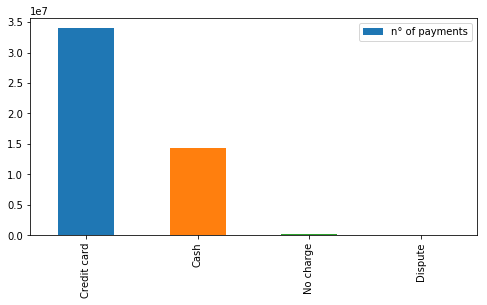

In [24]:
barplot = group_manhattan.plot(use_index = True, y = "n° of payments", kind = "bar", figsize = (8, 4))

We can repeat for Manhattan the same considerations already done in the two previous cases. The credit card payment is by far the most common way of paying taxi trips, immediately followed by cash payments.

### Staten Island

In [25]:
group_statenisland = group_data.get_group('Staten Island')
group_statenisland

,,n° of payments
payment_type,Borough,
1.0,Staten Island,310
2.0,Staten Island,274
3.0,Staten Island,24
4.0,Staten Island,7


In [26]:
group_statenisland.index = ["Credit card", "Cash", "No charge", "Dispute"]
group_statenisland

,n° of payments
Credit card,310
Cash,274
No charge,24
Dispute,7


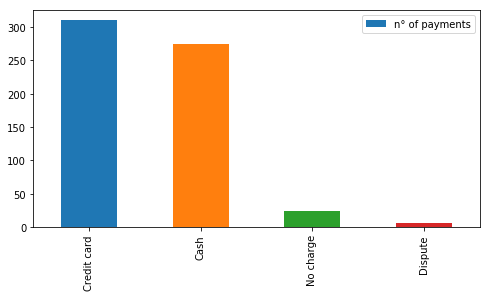

In [27]:
barplot = group_statenisland.plot(use_index = True, y = "n° of payments", kind = "bar", figsize = (8, 4))

In Staten Island, the number of cash payments increases by a discrete amount, in relation to the number of payments by credit card, almost reaching the latter, for the first time among the cases observed so far.

### Brooklyn

In [28]:
group_brooklyn = group_data.get_group('Brooklyn')
group_brooklyn

,,n° of payments
payment_type,Borough,
1.0,Brooklyn,435433
2.0,Brooklyn,225110
3.0,Brooklyn,6168
4.0,Brooklyn,1615


In [29]:
group_brooklyn.index = ["Credit card", "Cash", "No charge", "Dispute"]
group_brooklyn

,n° of payments
Credit card,435433
Cash,225110
No charge,6168
Dispute,1615


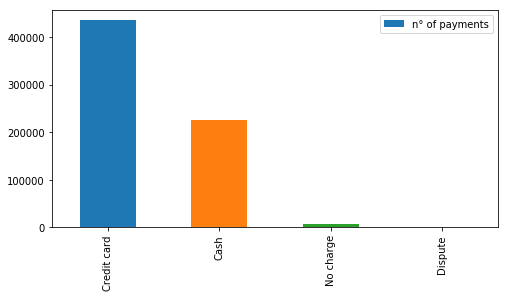

In [30]:
barplot = group_brooklyn.plot(use_index = True, y = "n° of payments", kind = "bar", figsize = (8, 4))

Brooklyn follows the common trend of credit cards as the preferred way of paying taxi runs.

### Bronx

In [31]:
group_bronx = group_data.get_group('Bronx')
group_bronx

,,n° of payments
payment_type,Borough,
1.0,Bronx,26463
2.0,Bronx,23839
3.0,Bronx,775
4.0,Bronx,217


In [32]:
group_bronx.index = ["Credit card", "Cash", "No charge", "Dispute"]
group_bronx

,n° of payments
Credit card,26463
Cash,23839
No charge,775
Dispute,217


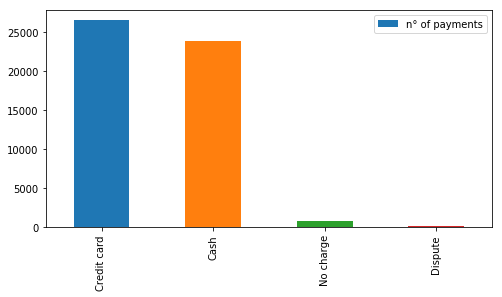

In [33]:
barplot = group_bronx.plot(use_index = True, y = "n° of payments", kind = "bar", figsize = (8, 4))

In Bronx, lastly, we find again the increase of payments by cash already observed in Staten Island.

In [36]:
# To check the relationship b/w Borough & payment type

pay_typ=final_yr['payment_type']
borough=final_yr['Borough']

### $\chi^2$ test

We now want to test in a quantitative way the hypotetical correlation between borough and payment method. We will make use of the $\chi^2$ test, applying it to a contingency table containing the number of payments, corresponding the different methods, in each borough.

In [37]:
from scipy.stats import chi2_contingency

table = pd.crosstab(pay_typ,borough)
print(table)

Borough       Bronx  Brooklyn  EWR  Manhattan   Queens  Staten Island
payment_type                                                         
1.0           26463    435433  835   34003374  2238842            310
2.0           23839    225110  161   14337978   939758            274
3.0             775      6168   87     199272    24976             24
4.0             217      1615   15      58170     6859              7


In [38]:
table.values

array([[   26463,   435433,      835, 34003374,  2238842,      310],
       [   23839,   225110,      161, 14337978,   939758,      274],
       [     775,     6168,       87,   199272,    24976,       24],
       [     217,     1615,       15,    58170,     6859,        7]])

In [39]:
# Chi-square test

table = pd.crosstab(pay_typ,borough)

chi2, p , dof, expected=chi2_contingency(table.values)

print('Chi-square Statistics: ', (chi2,p))

Chi-square Statistics:  (32855.55556626348, 0.0)


The p-values is less than 0.05, so the null hypothesis is rejected. The payment method is correlated to the borough, in the given dataset.

# RQ5

***Does a long distance correlate with the duration of the trip on average?***

We are now going to highlight the ***linear correlation*** between the length and the duration of a trip. We will achieve this through the ***Pearson's coefficient*** $r$, whose values range from $r = -1$ (negative linear correlation) to $r = +1$ (positive linear correlation), while $r = 0$ stands for the absence of correlation.

We are going to perform the analysis for each one of the six months in the dataset under study.

### January

In [4]:
final_jan = keep_jan.copy()

The Pearson's coefficient is highly sensitive to the presence of ***outliers***, and to the ***skewness*** of the distributions under study (in this case, the ones corresponding to the trip length and duration).

Outliers, in particular, have a huge impact on the value of the Pearson's coefficient, challenging its effectiveness in making the linear correlation between the two variables explicit. In order to minimize this effect, we choose to filter out the trip distances above $l = 150$ miles, which seems to be a reasonable assumption, since the area of NYC is about $A = 468$ miles$^2$ (and only ~ $302$ miles$^2$ are land).

In [5]:
final_jan = keep_jan[keep_jan['trip_distance'] < 150]

We are now going to plot the distributions for the two variables. The trip distance is expressed in miles, while the trip duration is in minutes. Since the points are really dense and close to each other, we go for a plot line which connects the points, highlighting the shape and overall behaviour. We can immediately notice how the two distributions are both highly skewed.

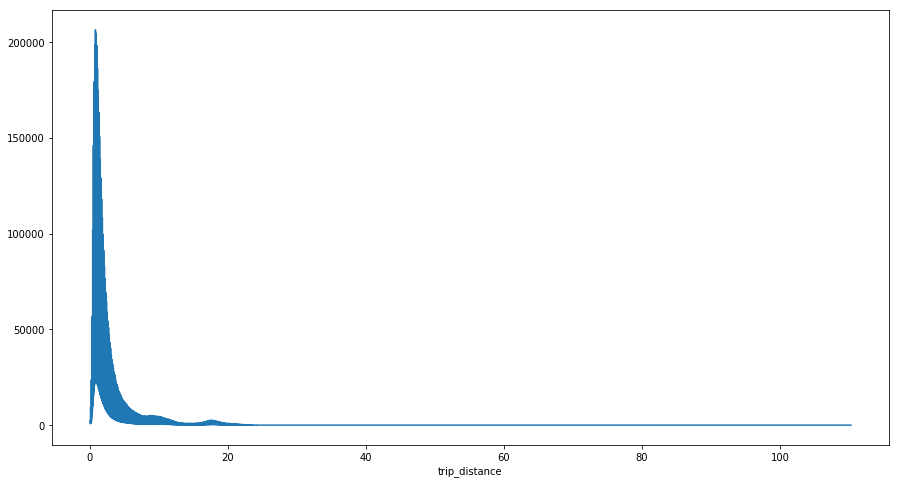

In [9]:
keep_trip_distance_jan = final_jan.groupby(final_jan["trip_distance"]).size()
plot = keep_trip_distance_jan.plot(use_index = True, y = "trip_distance", figsize = (15, 8))

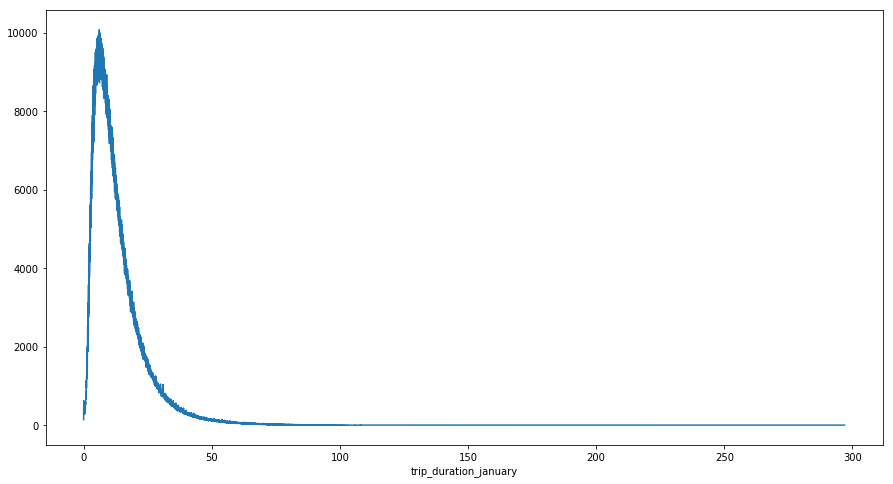

In [10]:
keep_trip_duration_jan = final_jan.groupby(final_jan["trip_duration_january"]).size()
plot = keep_trip_duration_jan.plot(use_index = True, y = "trip_duration", figsize = (15, 8))

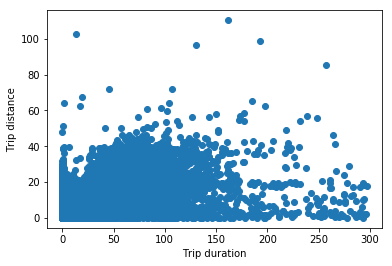

<Figure size 1440x720 with 0 Axes>

In [11]:
# Scatter Plot

import matplotlib.pyplot as plt
plt.scatter(final_jan['trip_duration_january'], final_jan['trip_distance'])
plt.xlabel("Trip duration")
plt.ylabel("Trip distance")
plt.figure(figsize=(20,10))
plt.show()

In [12]:
# Pearson's Coefficient

from scipy.stats import pearsonr
x = final_jan['trip_duration_january']
y = final_jan['trip_distance']

r,p = pearsonr(x,y)
print("Pearson's coefficient: ")
print(r)

print("p-value:")
print(p)

Pearson's coefficient: 
0.7967541418917348
p-value:
0.0


### February

In [6]:
final_feb = keep_feb.copy()

In [7]:
final_feb = final_feb[final_feb['trip_distance'] < 150]

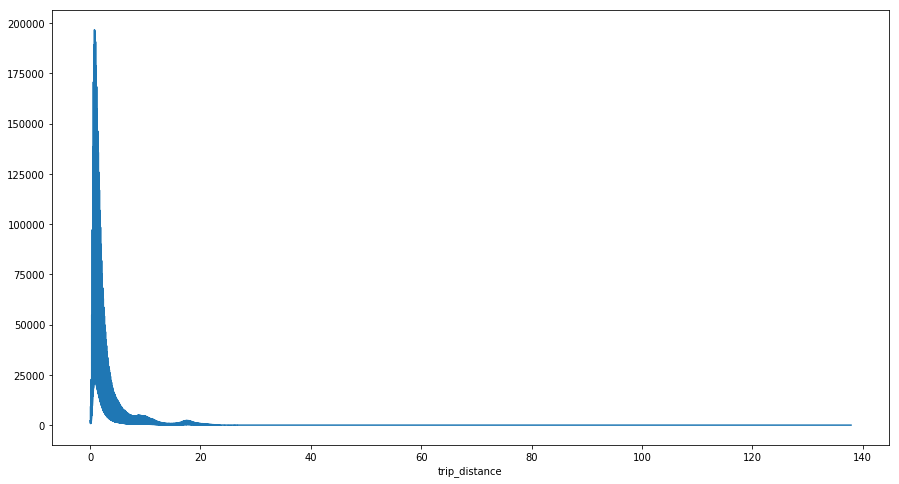

In [9]:
keep_trip_distance_feb = final_feb.groupby(keep_feb["trip_distance"]).size()
plot = keep_trip_distance_feb.plot(use_index = True, y = "trip_distance", figsize = (15, 8))

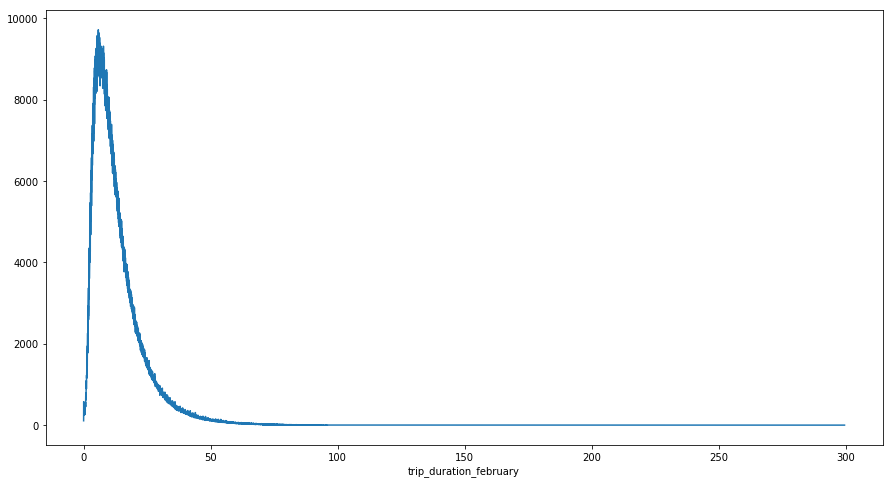

In [11]:
keep_trip_duration_feb = final_feb.groupby(final_feb["trip_duration_february"]).size()
plot = keep_trip_duration_feb.plot(use_index = True, y = "trip_duration_february", figsize = (15, 8))

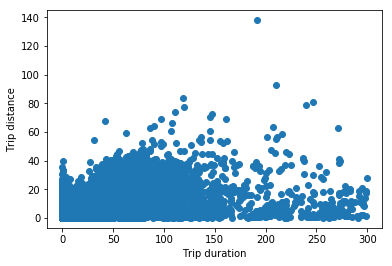

<Figure size 1440x720 with 0 Axes>

In [12]:
# Scatter Plot

import matplotlib.pyplot as plt
plt.scatter(final_feb['trip_duration_february'], final_feb['trip_distance'])
plt.xlabel("Trip duration")
plt.ylabel("Trip distance")
plt.figure(figsize=(20,10))
plt.show()

In [14]:
# Pearson's Coefficient

from scipy.stats import pearsonr
x = final_feb['trip_duration_february']
y = final_feb['trip_distance']

r,p = pearsonr(x,y)
print("Pearson's coefficient: ")
print(r)

print("p-value:")
print(p)

Pearson's coefficient: 
0.795498744699152
p-value:
0.0


### March

In [5]:
final_mar = keep_mar.copy()

In [6]:
final_mar = final_mar[final_mar['trip_distance'] < 150]

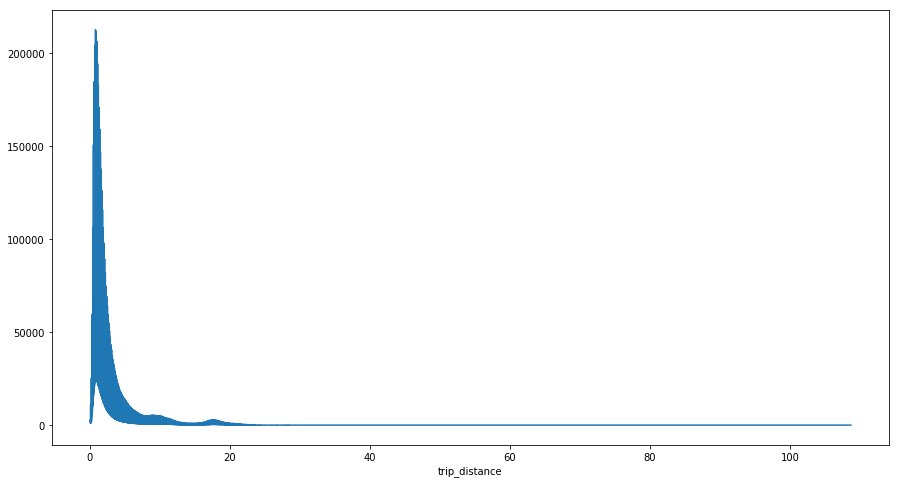

In [8]:
keep_trip_distance_mar = final_mar.groupby(final_mar["trip_distance"]).size()
plot = keep_trip_distance_mar.plot(use_index = True, y = "trip_distance", figsize = (15, 8))

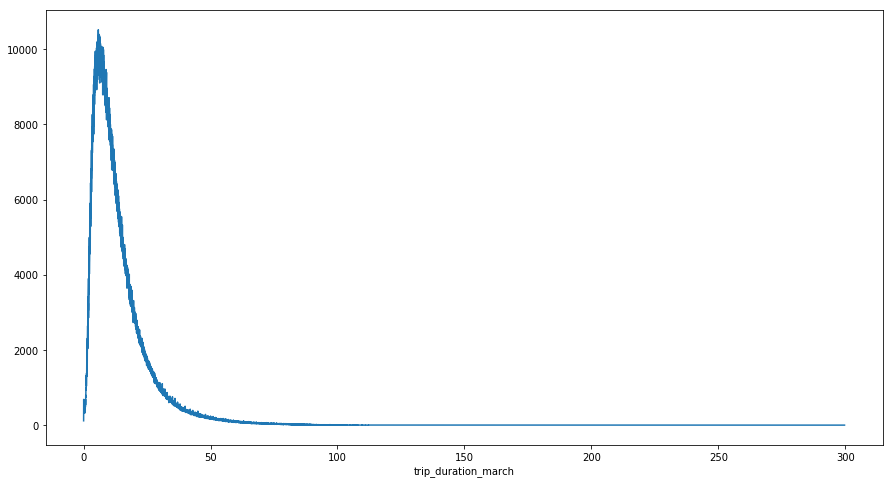

In [9]:
keep_trip_duration_mar = final_mar.groupby(final_mar["trip_duration_march"]).size()
plot = keep_trip_duration_mar.plot(use_index = True, y = "trip_duration_march", figsize = (15, 8))

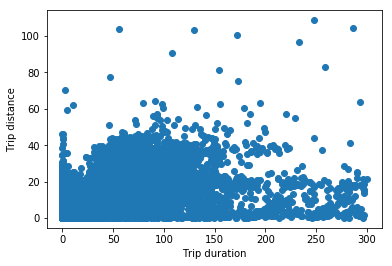

<Figure size 1440x720 with 0 Axes>

In [10]:
# Scatter Plot

import matplotlib.pyplot as plt
plt.scatter(final_mar['trip_duration_march'], final_mar['trip_distance'])
plt.xlabel("Trip duration")
plt.ylabel("Trip distance")
plt.figure(figsize=(20,10))
plt.show()

In [11]:
# Pearson Coefficient

from scipy.stats import pearsonr
x = final_mar['trip_duration_march']
y = final_mar['trip_distance']

r,p = pearsonr(x,y)
print("Pearson's coefficient: ")
print(r)

print("p-value:")
print(p)

Pearson's coefficient: 
0.7998798615917453
p-value:
0.0


### April

In [5]:
final_apr = keep_apr.copy()

In [6]:
final_apr = final_apr[final_apr['trip_distance'] < 150]

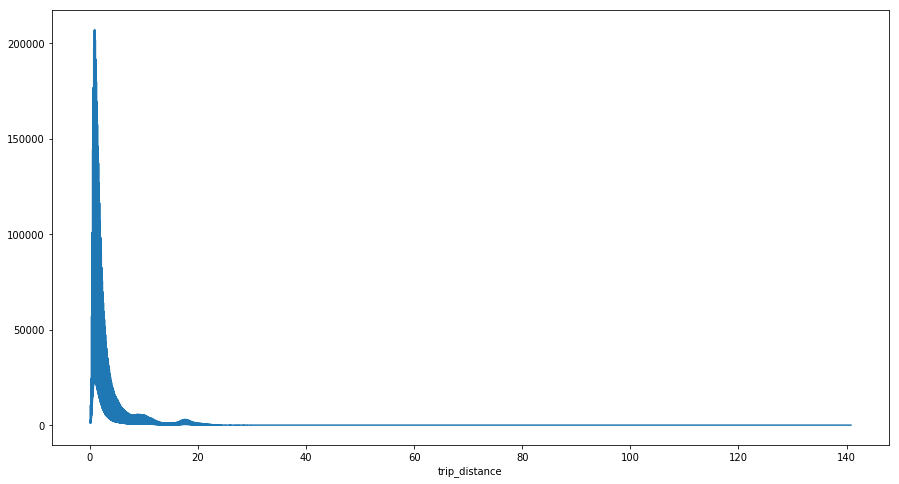

In [9]:
keep_trip_distance_apr = final_apr.groupby(final_apr["trip_distance"]).size()
plot = keep_trip_distance_apr.plot(use_index = True, y = "trip_distance", figsize = (15, 8))

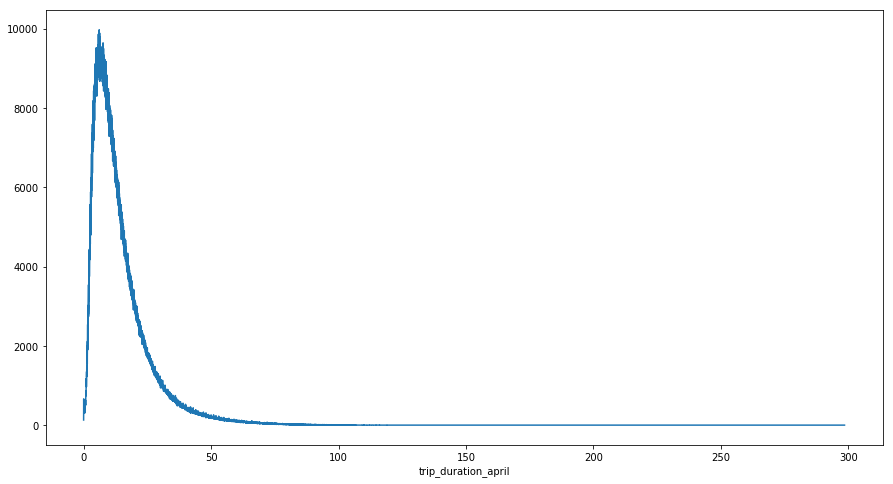

In [8]:
keep_trip_duration_apr = final_apr.groupby(final_apr["trip_duration_april"]).size()
plot = keep_trip_duration_apr.plot(use_index = True, y = "trip_duration_april", figsize = (15, 8))

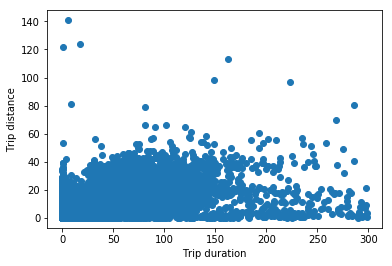

<Figure size 1440x720 with 0 Axes>

In [10]:
# Scatter Plot

import matplotlib.pyplot as plt
plt.scatter(final_apr['trip_duration_april'], final_apr['trip_distance'])
plt.xlabel("Trip duration")
plt.ylabel("Trip distance")
plt.figure(figsize=(20,10))
plt.show()

In [11]:
# Pearson Coefficient

from scipy.stats import pearsonr
x = final_apr['trip_duration_april']
y = final_apr['trip_distance']

r,p = pearsonr(x,y)
print("Pearson's coefficient: ")
print(r)

print("p-value:")
print(p)

Pearson's coefficient: 
0.8022826037790336
p-value:
0.0


### May

In [5]:
final_may = keep_may.copy()

In [6]:
final_may = final_may[final_may['trip_distance'] < 150]

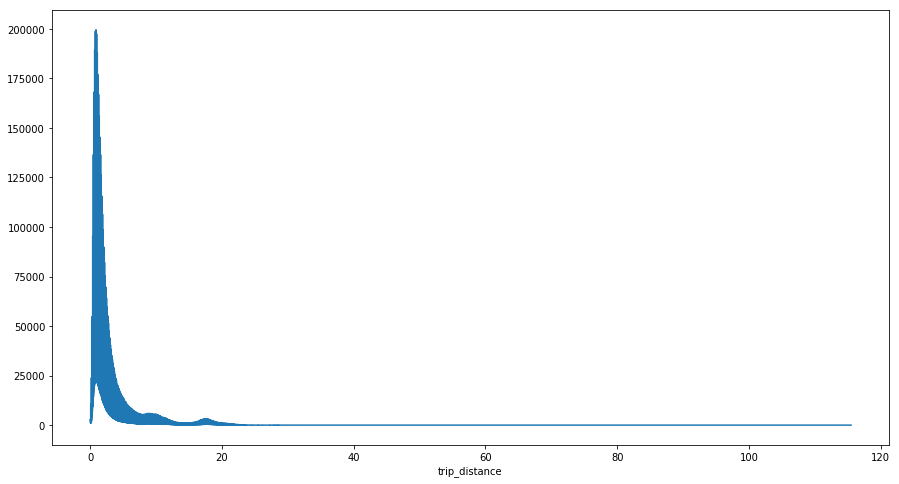

In [9]:
keep_trip_distance_may = final_may.groupby(final_may["trip_distance"]).size()
plot = keep_trip_distance_may.plot(use_index = True, y = "trip_distance", figsize = (15, 8))

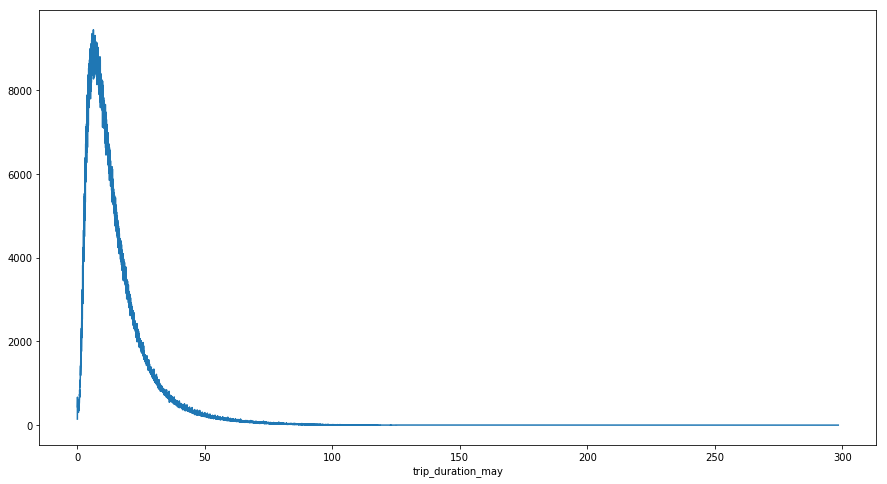

In [8]:
keep_trip_duration_may = final_may.groupby(final_may["trip_duration_may"]).size()
plot = keep_trip_duration_may.plot(use_index = True, y = "trip_duration_may", figsize = (15, 8))

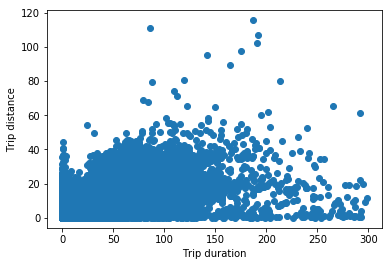

<Figure size 1440x720 with 0 Axes>

In [11]:
# Scatter Plot

import matplotlib.pyplot as plt
plt.scatter(final_may['trip_duration_may'], final_may['trip_distance'])
plt.xlabel("Trip duration")
plt.ylabel("Trip distance")
plt.figure(figsize=(20,10))
plt.show()

In [13]:
# Pearson Coefficient

from scipy.stats import pearsonr
x = final_may['trip_duration_may']
y = final_may['trip_distance']

r,p = pearsonr(x,y)
print("Pearson's coefficient: ")
print(r)

print("p-value:")
print(p)

Pearson's coefficient: 
0.7948319786579464
p-value:
0.0


### June

In [5]:
final_jun = keep_jun.copy()

In [6]:
final_jun = final_jun[final_jun['trip_distance'] < 150]

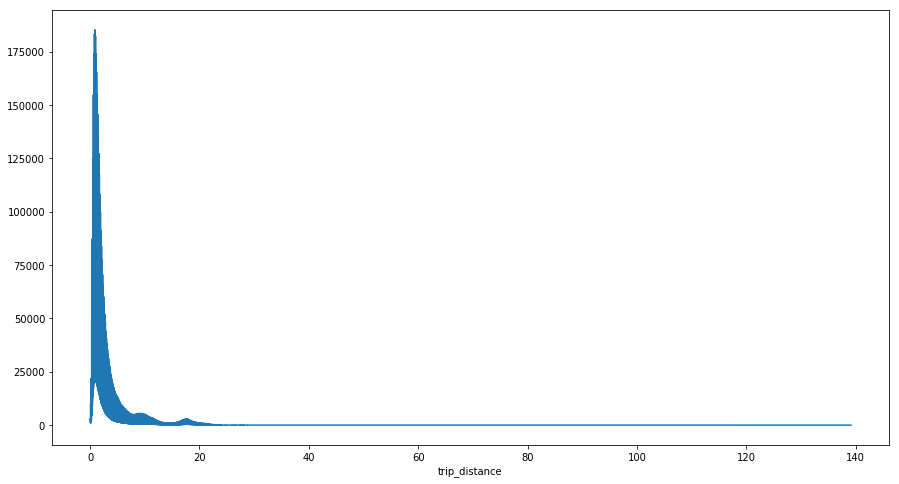

In [8]:
keep_trip_distance_jun = final_jun.groupby(final_jun["trip_distance"]).size()
barplot = keep_trip_distance_jun.plot(use_index = True, y = "trip_distance", figsize = (15, 8))

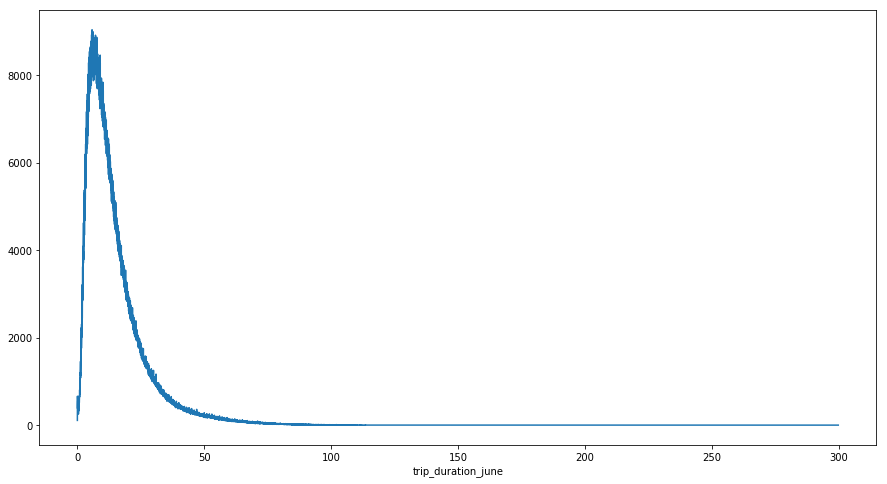

In [9]:
keep_trip_duration_jun = final_jun.groupby(final_jun["trip_duration_june"]).size()
barplot = keep_trip_duration_jun.plot(use_index = True, y = "trip_duration", figsize = (15, 8))

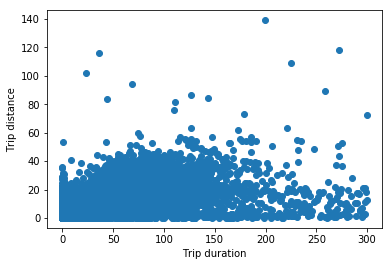

<Figure size 1440x720 with 0 Axes>

In [10]:
# Scatter Plot

import matplotlib.pyplot as plt
plt.scatter(final_jun['trip_duration_june'], final_jun['trip_distance'])
plt.xlabel("Trip duration")
plt.ylabel("Trip distance")
plt.figure(figsize=(20,10))
plt.show()

In [11]:
# Pearson Coefficient

from scipy.stats import pearsonr
x = final_jun['trip_duration_june']
y = final_jun['trip_distance']

r,p = pearsonr(x,y)
print("Pearson's coefficient: ")
print(r)

print("p-value:")
print(p)

Pearson's coefficient: 
0.809366967432261
p-value:
0.0


We can observe how, in each one of the 6 months under study, the conclusions seem to be quite similar. In each case, we have a few outliers surviving the filtering process, and the two distributions (trip distance and trip duration) appear to be highly skewed. This might have a negative impact on the effectiveness of Pearson's coefficient as an instrument to show the linear correlation. 

The scatter plots, indeed, seem to be quite sparse, even though we can observe a soft, overall, positively increasing tendence, which could be a hint of a slightly positive linear correlation between the two variables. 

We can, of course, translate this evidence in more quantitative terms through the actual calculation of the Pearson's coefficent. 

As a matter of fact, the coefficient points towards a correlation between the trip length and duration, taking values around $r \simeq 0.8$. This evidence appears to be quite easy to justify from a logical point to view, and can therefore be considered a reasonable conclusion.

# CRQ1

***Does the fare for mile change across NY's borough?***

We start by blending the cleaned datasets of the different months into a single dataframe, applying some further modifications to it, like the reasonable condition that the trip duration is greater than 30 seconds and that the trip length is less than 100 miles (which seems to be a logical assumption since the land area of NYC is about $302$ miles$^2$, as already noted).

In [8]:
jan = keep_jan[['trip_distance', 'trip_duration_january', 'fare_amount', 'PULocationID']]
jan = jan.rename(columns = {'trip_duration_january':'trip_duration'})
feb = keep_feb[['trip_distance', 'trip_duration_february', 'fare_amount', 'PULocationID']]
feb = feb.rename(columns = {'trip_duration_february':'trip_duration'})
mar = keep_mar[['trip_distance', 'trip_duration_march', 'fare_amount', 'PULocationID']]
mar = mar.rename(columns = {'trip_duration_march':'trip_duration'})
apr = keep_apr[['trip_distance', 'trip_duration_april', 'fare_amount', 'PULocationID']]
apr = apr.rename(columns = {'trip_duration_april':'trip_duration'})
may = keep_may[['trip_distance', 'trip_duration_may', 'fare_amount', 'PULocationID']]
may = may.rename(columns = {'trip_duration_may':'trip_duration'})
jun = keep_jun[['trip_distance', 'trip_duration_june', 'fare_amount', 'PULocationID']]
jun = jun.rename(columns = {'trip_duration_june':'trip_duration'})

In [9]:
final_yr = pd.concat([jan, feb, mar, apr, may, jun])

final_yr = final_yr[final_yr['trip_duration'] > 0.5]
final_yr = final_yr[final_yr['trip_distance'] < 100]
final_yr = final_yr[final_yr['fare_amount'] > 0]

We can now compute the ***price per mile***, dividing the fare amount (in dollars) by the trip distance (in miles)

In [10]:
final_yr["price_per_mile"] = final_yr["fare_amount"]/final_yr["trip_distance"]
final_yr = final_yr[final_yr["price_per_mile"] > 2.5]
final_yr = final_yr[final_yr["price_per_mile"] < 20]

In [11]:
# Drop columns which are not useful anymore

final_yr = final_yr.drop(labels = ["fare_amount", "trip_distance"], axis = 1)

We can also compute the ***weighted price per mile***, to take into account the duration of the trip. In order to to this, we simply divide the price per mile by the trip duration (in minutes)

In [12]:
final_yr["weighted_price_per_mile"] = final_yr["price_per_mile"]/final_yr["trip_duration"]

In [13]:
# Drop columns which are not useful anymore

final_yr = final_yr.drop(labels = ["trip_duration"], axis = 1)

In [14]:
# Pair locations with boroughs

final_yr = final_yr.set_index('PULocationID').join(df.set_index('LocationID'))
final_yr = final_yr.drop(labels = ["Zone", "service_zone"], axis = 1)

In [15]:
final_yr = final_yr.groupby(final_yr['Borough'])

In [16]:
# Extract single boroughs from dataframe

keep_ewr = final_yr.get_group("EWR")
keep_ewr = keep_ewr.drop(labels = ["Borough"], axis = 1)

keep_queens = final_yr.get_group("Queens")
keep_queens = keep_queens.drop(labels = ["Borough"], axis = 1)

keep_manhattan = final_yr.get_group("Manhattan")
keep_manhattan = keep_manhattan.drop(labels = ["Borough"], axis = 1)

keep_statenisland = final_yr.get_group("Staten Island")
keep_statenisland = keep_statenisland.drop(labels = ["Borough"], axis = 1)

keep_bronx = final_yr.get_group("Bronx")
keep_bronx = keep_bronx.drop(labels = ["Borough"], axis = 1)

keep_brooklyn = final_yr.get_group("Brooklyn")
keep_brooklyn = keep_brooklyn.drop(labels = ["Borough"], axis = 1)

### EWR

We are now going to compute the mean, the variance, and the standard deviation of the ***price per mile*** and the ***weighted price per mile***, for every borough. We will also plot the distribution of these two quantities.

In [17]:
keep_ewr.index = range(len(keep_ewr))

In [18]:
# Compute the mean, variance, and standard deviation

mean_ppm_ewr = keep_ewr["price_per_mile"].mean()
var_ppm_ewr = keep_ewr["price_per_mile"].var()
std_ppm_ewr = keep_ewr["price_per_mile"].std()
n_ewr = len(keep_ewr)

print("ewr, price per mile: mean = " + str(mean_ppm_ewr) + " , " + "standard deviation = " + str(std_ppm_ewr))

ewr, price per mile: mean = 5.618358902201683 , standard deviation = 3.5056587149738805


In [19]:
mean_wppm_ewr = keep_ewr["weighted_price_per_mile"].mean()
var_wppm_ewr = keep_ewr["weighted_price_per_mile"].var()
std_wppm_ewr = keep_ewr["weighted_price_per_mile"].std()

print("ewr, weighted price per mile: mean = " + str(mean_wppm_ewr) + " , " + "standard deviation = " + str(std_wppm_ewr))

ewr, weighted price per mile: mean = 4.547237446697899 , standard deviation = 6.665624385674582


In [20]:
import numpy as np

# group the trip durations in intervals of 5 $/mile/minute
keep_ewr["price_per_mile"] = np.floor(keep_ewr["price_per_mile"]/2)
keep_ewr["weighted_price_per_mile"] = np.floor(keep_ewr["weighted_price_per_mile"]/2)

We can now plot the two ***distributions***. The overall behaviour we observe in every plot (i.e., for every borough) is that a high number of trips share a low value of the price per mile (around 0 ~ 3 \$/mile) and of the weighted price per mile (around 0 ~ 1 \$/mile/min). Therefore, the shape of the distribution for the weighted price per mile resembles very closely the shape of the price per mile distribution, even though the former shows a steeper descent (for increasing intervals) than the latter. We will note some exceptions.

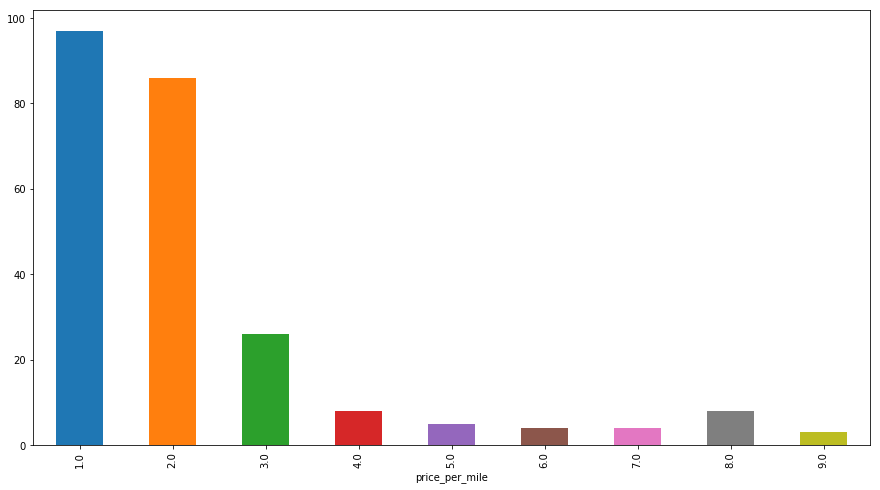

In [23]:
keep_ewr.groupby(keep_ewr["price_per_mile"]).size().plot(use_index = True, y = "price_per_mile", kind = "bar", figsize = (15, 8))

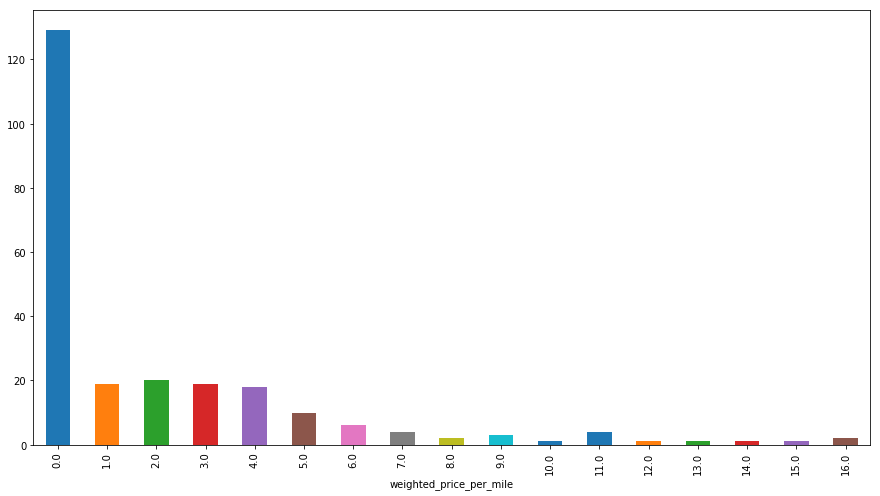

In [24]:
keep_ewr.groupby(keep_ewr["weighted_price_per_mile"]).size().plot(use_index = True, y = "weighted_price_per_mile", kind = "bar", figsize = (15, 8))

### Queens

In [25]:
keep_queens.index = range(len(keep_queens))

In [26]:
mean_ppm_queens = keep_queens["price_per_mile"].mean()
var_ppm_queens = keep_queens["price_per_mile"].var()
std_ppm_queens = keep_queens["price_per_mile"].std()
n_queens = len(keep_queens)

print("queens, price per mile: mean = " + str(mean_ppm_queens) + " , " + "standard deviation = " + str(std_ppm_queens))

queens, price per mile: mean = 3.5028793097172337 , standard deviation = 1.279673424281828


In [27]:
mean_wppm_queens = keep_queens["weighted_price_per_mile"].mean()
var_wppm_queens = keep_queens["weighted_price_per_mile"].var()
std_wppm_queens = keep_queens["weighted_price_per_mile"].std()

print("queens, weighted price per mile: mean = " + str(mean_wppm_queens) + " , " + "standard deviation = " + str(std_wppm_queens))

queens, weighted price per mile: mean = 0.23712917229266034 , standard deviation = 0.6968856858107786


In [28]:
import numpy as np

# group the trip durations in intervals of 5 $/mile/minute
keep_queens["price_per_mile"] = np.floor(keep_queens["price_per_mile"]/2)
keep_queens["weighted_price_per_mile"] = np.floor(keep_queens["weighted_price_per_mile"]/2)

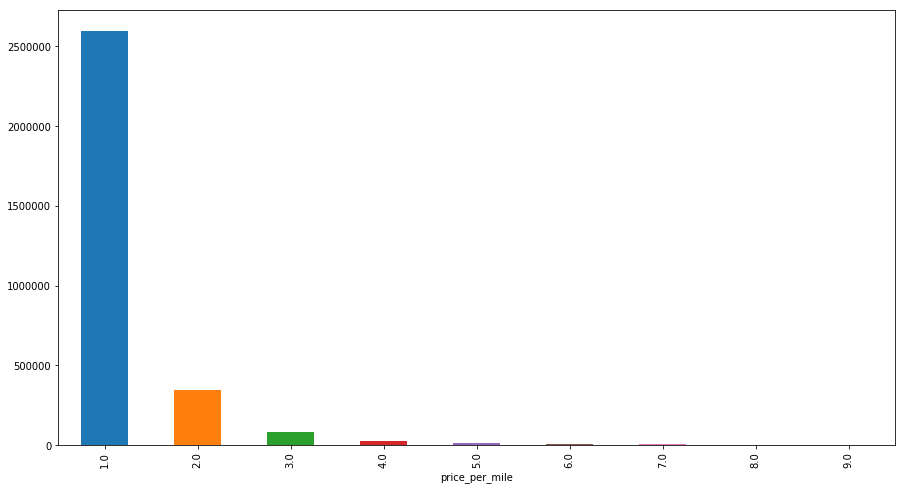

In [29]:
keep_queens.groupby(keep_queens["price_per_mile"]).size().plot(use_index = True, y = "price_per_mile", kind = "bar", figsize = (15, 8))

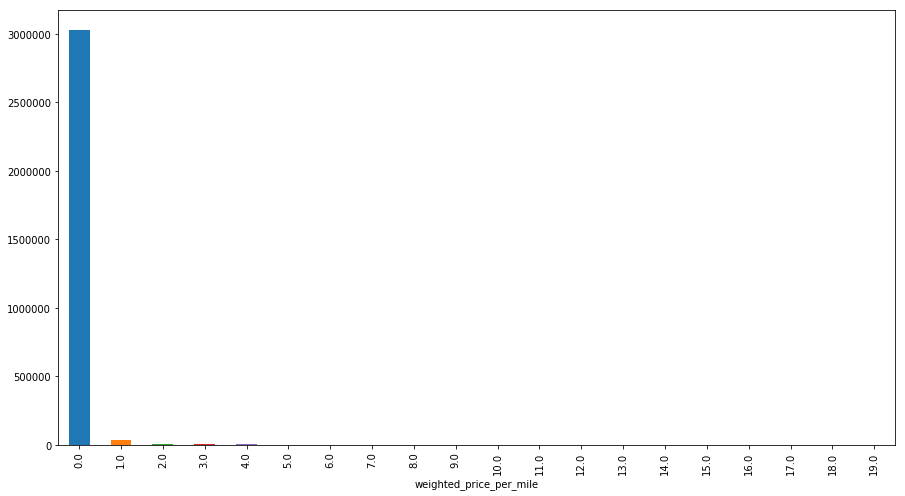

In [30]:
keep_queens.groupby(keep_queens["weighted_price_per_mile"]).size().plot(use_index = True, y = "weighted_price_per_mile", kind = "bar", figsize = (15, 8))

### Manhattan

In [31]:
keep_manhattan.index = range(len(keep_manhattan))

In [32]:
mean_ppm_manhattan = keep_manhattan["price_per_mile"].mean()
var_ppm_manhattan = keep_manhattan["price_per_mile"].var()
std_ppm_manhattan = keep_manhattan["price_per_mile"].std()
n_manhattan = len(keep_manhattan)

print("manhattan, price per mile: mean = " + str(mean_ppm_manhattan) + " , " + "standard deviation = " + str(std_ppm_manhattan))

manhattan, price per mile: mean = 6.10351001143675 , standard deviation = 2.2528170396323732


In [33]:
mean_wppm_manhattan = keep_manhattan["weighted_price_per_mile"].mean()
var_wppm_manhattan = keep_manhattan["weighted_price_per_mile"].var()
std_wppm_manhattan = keep_manhattan["weighted_price_per_mile"].std()

print("manhattan, weighted price per mile: mean = " + str(mean_wppm_manhattan) + " , " + "standard deviation = " + str(std_wppm_manhattan))

manhattan, weighted price per mile: mean = 0.8748600411882574 , standard deviation = 1.129516059879389


In [34]:
import numpy as np

# group the trip durations in intervals of 5 $/mile/minute
keep_manhattan["price_per_mile"] = np.floor(keep_manhattan["price_per_mile"]/2)
keep_manhattan["weighted_price_per_mile"] = np.floor(keep_manhattan["weighted_price_per_mile"]/2)

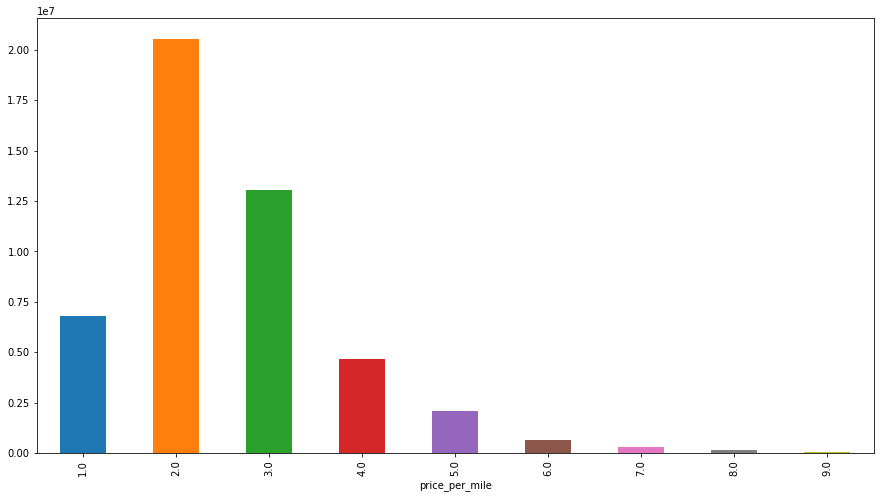

In [35]:
keep_manhattan.groupby(keep_manhattan["price_per_mile"]).size().plot(use_index = True, y = "price_per_mile", kind = "bar", figsize = (15, 8))

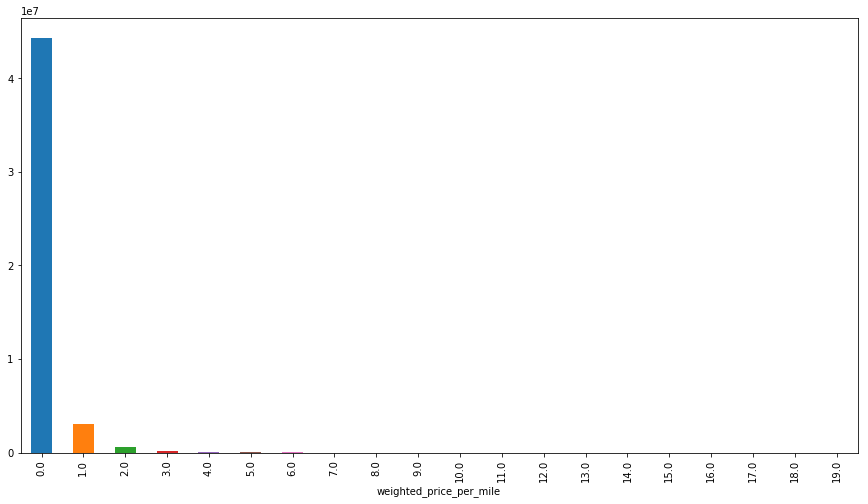

In [36]:
keep_manhattan.groupby(keep_manhattan["weighted_price_per_mile"]).size().plot(use_index = True, y = "weighted_price_per_mile", kind = "bar", figsize = (15, 8))

Manhattan is the first exception to the behaviour described at the beginning, since distribution for the price per mile increases in the interval 2 ~ 3 \$/mile, before falling back down, while this behaviour is not followed by the weighted price per mile distribution, which is monotonically decreasing.

### Staten Island

In [37]:
keep_statenisland.index = range(len(keep_statenisland))

In [38]:
mean_ppm_statenisland = keep_statenisland["price_per_mile"].mean()
var_ppm_statenisland = keep_statenisland["price_per_mile"].var()
std_ppm_statenisland = keep_statenisland["price_per_mile"].std()
n_statenisland = len(keep_statenisland)

print("statenisland, price per mile: mean = " + str(mean_ppm_statenisland) + " , " + "standard deviation = " + str(std_ppm_statenisland))

statenisland, price per mile: mean = 4.739070756223678 , standard deviation = 2.6955065640438307


In [39]:
mean_wppm_statenisland = keep_statenisland["weighted_price_per_mile"].mean()
var_wppm_statenisland = keep_statenisland["weighted_price_per_mile"].var()
std_wppm_statenisland = keep_statenisland["weighted_price_per_mile"].std()

print("statenisland, weighted price per mile: mean = " + str(mean_wppm_statenisland) + " , " + "standard deviation = " + str(std_wppm_statenisland))

statenisland, weighted price per mile: mean = 2.2339627844947603 , standard deviation = 4.918591932732439


In [40]:
import numpy as np

# group the trip durations in intervals of 5 $/mile/minute
keep_statenisland["price_per_mile"] = np.floor(keep_statenisland["price_per_mile"]/2)
keep_statenisland["weighted_price_per_mile"] = np.floor(keep_statenisland["weighted_price_per_mile"]/2)

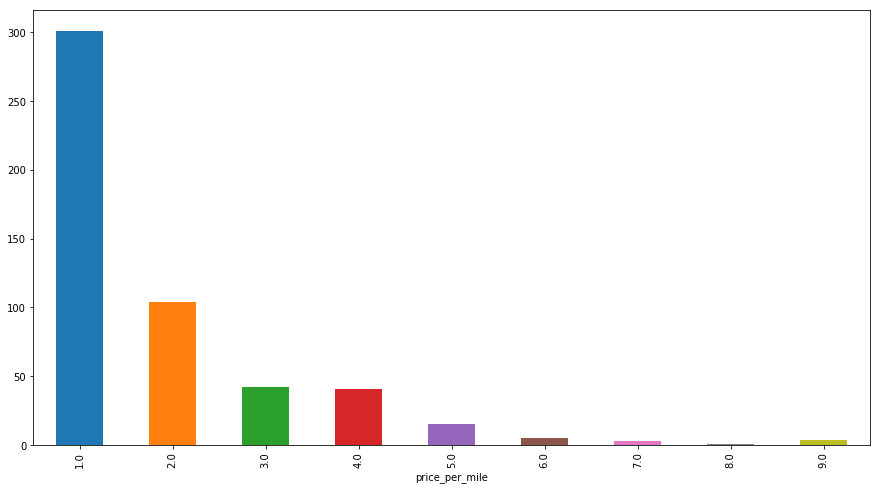

In [41]:
keep_statenisland.groupby(keep_statenisland["price_per_mile"]).size().plot(use_index = True, y = "price_per_mile", kind = "bar", figsize = (15, 8))

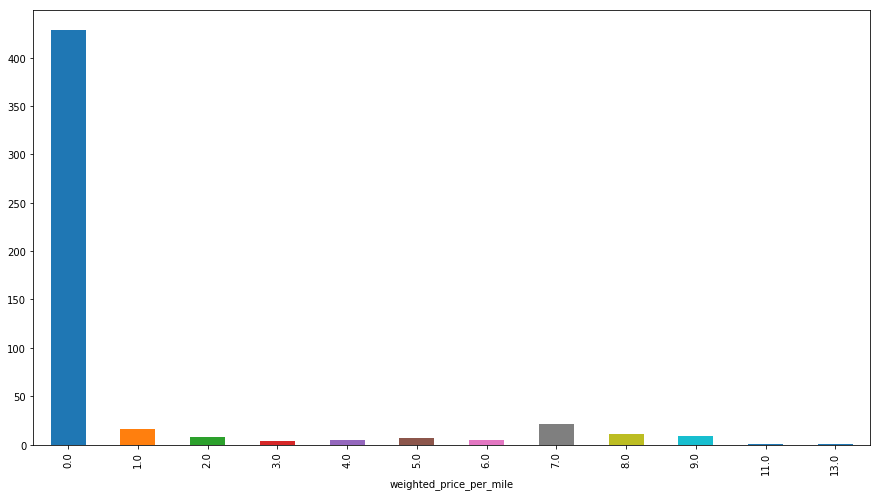

In [42]:
keep_statenisland.groupby(keep_statenisland["weighted_price_per_mile"]).size().plot(use_index = True, y = "weighted_price_per_mile", kind = "bar", figsize = (15, 8))

### Bronx

In [43]:
keep_bronx.index = range(len(keep_bronx))

In [44]:
mean_ppm_bronx = keep_bronx["price_per_mile"].mean()
var_ppm_bronx = keep_bronx["price_per_mile"].var()
std_ppm_bronx = keep_bronx["price_per_mile"].std()
n_bronx = len(keep_bronx)

print("bronx, price per mile: mean = " + str(mean_ppm_bronx) + " , " + "standard deviation = " + str(std_ppm_bronx))

bronx, price per mile: mean = 4.890979181717779 , standard deviation = 2.0571303767738165


In [45]:
mean_wppm_bronx = keep_bronx["weighted_price_per_mile"].mean()
var_wppm_bronx = keep_bronx["weighted_price_per_mile"].var()
std_wppm_bronx = keep_bronx["weighted_price_per_mile"].std()

print("bronx, weighted price per mile: mean = " + str(mean_wppm_bronx) + " , " + "standard deviation = " + str(std_wppm_bronx))

bronx, weighted price per mile: mean = 0.6768986826899428 , standard deviation = 1.442988762509663


In [46]:
import numpy as np

# group the trip durations in intervals of 5 $/mile/minute
keep_bronx["price_per_mile"] = np.floor(keep_bronx["price_per_mile"]/2)
keep_bronx["weighted_price_per_mile"] = np.floor(keep_bronx["weighted_price_per_mile"]/2)

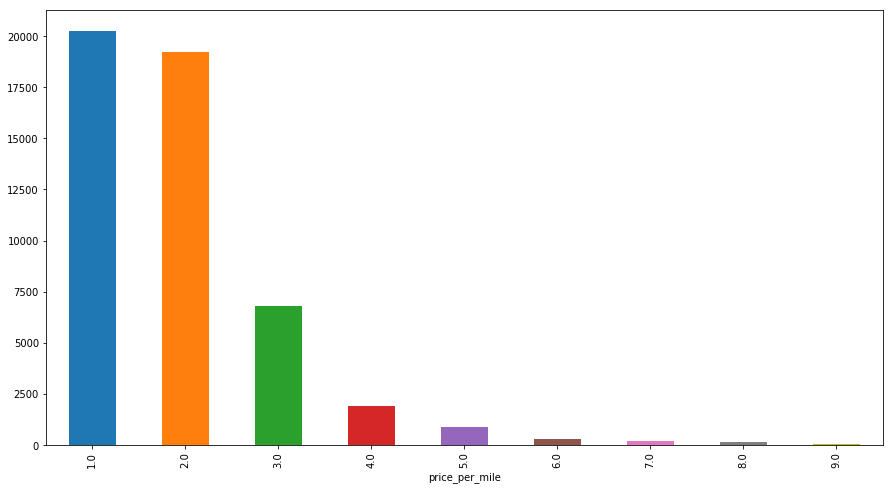

In [47]:
keep_bronx.groupby(keep_bronx["price_per_mile"]).size().plot(use_index = True, y = "price_per_mile", kind = "bar", figsize = (15, 8))

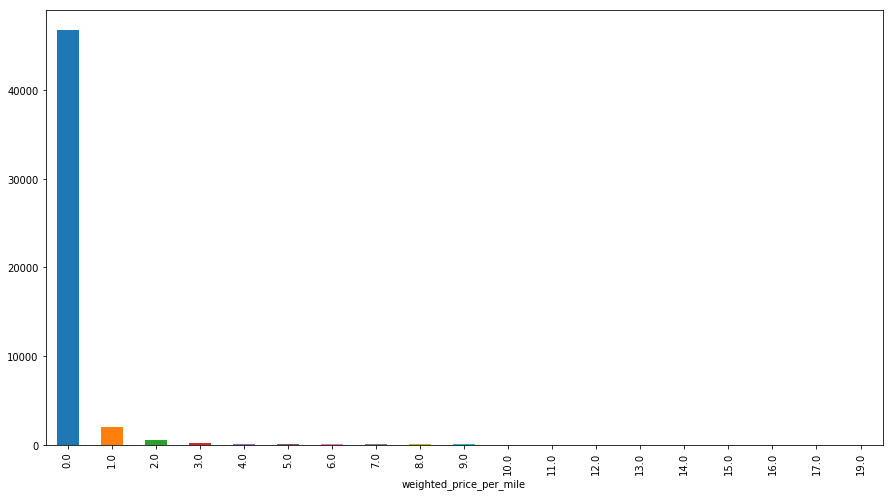

In [48]:
keep_bronx.groupby(keep_bronx["weighted_price_per_mile"]).size().plot(use_index = True, y = "weighted_price_per_mile", kind = "bar", figsize = (15, 8))

In Bronx, while the price per mile is still decreasing, the level in the 1 ~ 2 \$/mile interval is closer than usual to that of in the 2 ~ 3 \$/mile interval.

### Brooklyn

In [49]:
keep_brooklyn.index = range(len(keep_brooklyn))

In [50]:
mean_ppm_brooklyn = keep_brooklyn["price_per_mile"].mean()
var_ppm_brooklyn = keep_brooklyn["price_per_mile"].var()
std_ppm_brooklyn = keep_brooklyn["price_per_mile"].std()
n_brooklyn = len(keep_brooklyn)

print("brooklyn, price per mile: mean = " + str(mean_ppm_brooklyn) + " , " + "standard deviation = " + str(std_ppm_brooklyn))

brooklyn, price per mile: mean = 5.024706900709101 , standard deviation = 1.8949492948286475


In [51]:
mean_wppm_brooklyn = keep_brooklyn["weighted_price_per_mile"].mean()
var_wppm_brooklyn = keep_brooklyn["weighted_price_per_mile"].var()
std_wppm_brooklyn = keep_brooklyn["weighted_price_per_mile"].std()

print("brooklyn, weighted price per mile: mean = " + str(mean_wppm_brooklyn) + " , " + "standard deviation = " + str(std_wppm_brooklyn))

brooklyn, weighted price per mile: mean = 0.7023077753373158 , standard deviation = 1.1303193787476458


In [52]:
import numpy as np

# group the trip durations in intervals of 5 $/mile/minute
keep_brooklyn["price_per_mile"] = np.floor(keep_brooklyn["price_per_mile"]/2)
keep_brooklyn["weighted_price_per_mile"] = np.floor(keep_brooklyn["weighted_price_per_mile"]/2)

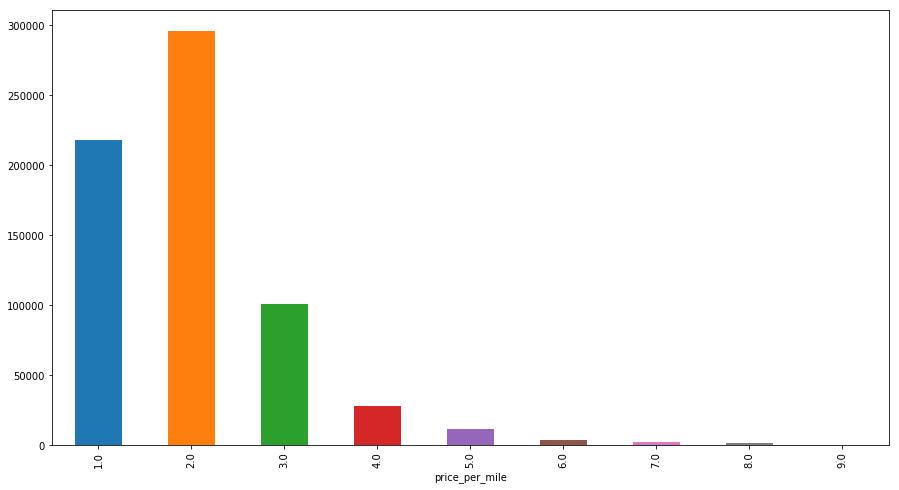

In [53]:
keep_brooklyn.groupby(keep_brooklyn["price_per_mile"]).size().plot(use_index = True, y = "price_per_mile", kind = "bar", figsize = (15, 8))

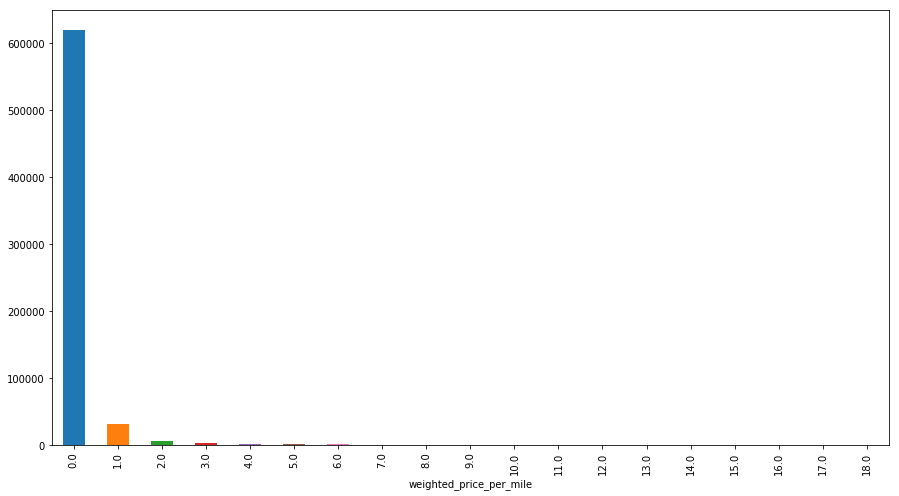

In [54]:
keep_brooklyn.groupby(keep_brooklyn["weighted_price_per_mile"]).size().plot(use_index = True, y = "weighted_price_per_mile", kind = "bar", figsize = (15, 8))

### t-test

We are now going to perform the ***t-test*** to check if the price per mile and the weighted price per mile show statistically significant differences among different boroughs. We will thus compute the ***t-value*** and compare it with a critical threshold by calculating the ***p-value***. If the p-value is less then $0.05$, which we assume as a significance level, we can reject the null hypothesis $H_0$ (i.e. that there is no meaningful difference between the two boroughs) and accept the alternate hypothesis $H_1$ (i.e. that there is a meaningful difference between the two boroughs)

### Price per mile: t - test

We are going to compute the t-value and the p-value for each possible pair of boroughs, and then print the p-value

In [55]:
import numpy as np
from scipy import stats

t = (mean_ppm_ewr - mean_ppm_queens)/np.sqrt(var_ppm_ewr/n_ewr + var_ppm_queens/n_queens)
dof = n_ewr + n_queens - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nEWR ~ QUEENS")
print(p)

t = (mean_ppm_ewr - mean_ppm_manhattan)/np.sqrt(var_ppm_ewr/n_ewr + var_ppm_manhattan/n_manhattan)
dof = n_ewr + n_manhattan - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nEWR ~ MANHATTAN")
print(p)

t = (mean_ppm_ewr - mean_ppm_statenisland)/np.sqrt(var_ppm_ewr/n_ewr + var_ppm_statenisland/n_statenisland)
dof = n_ewr + n_statenisland - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nEWR ~ STATEN ISLAND")
print(p)

t = (mean_ppm_ewr - mean_ppm_bronx)/np.sqrt(var_ppm_ewr/n_ewr + var_ppm_bronx/n_bronx)
dof = n_ewr + n_bronx - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nEWR ~ BRONX")
print(p)

t = (mean_ppm_queens - mean_ppm_manhattan)/np.sqrt(var_ppm_queens/n_queens + var_ppm_manhattan/n_manhattan)
dof = n_queens + n_manhattan - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nQUEENS ~ MANHATTAN")
print(p)

t = (mean_ppm_queens - mean_ppm_statenisland)/np.sqrt(var_ppm_queens/n_queens + var_ppm_statenisland/n_statenisland)
dof = n_queens + n_statenisland - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nQUEENS ~ STATENISLAND")
print(p)

t = (mean_ppm_queens - mean_ppm_bronx)/np.sqrt(var_ppm_queens/n_queens + var_ppm_bronx/n_bronx)
dof = n_queens + n_bronx - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nQUEENS ~ BRONX")
print(p)

t = (mean_ppm_manhattan - mean_ppm_statenisland)/np.sqrt(var_ppm_manhattan/n_manhattan + var_ppm_statenisland/n_statenisland)
dof = n_manhattan + n_statenisland - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nMANHATTAN ~ STATEN ISLAND")
print(p)

t = (mean_ppm_manhattan - mean_ppm_bronx)/np.sqrt(var_ppm_manhattan/n_manhattan + var_ppm_bronx/n_bronx)
dof = n_manhattan + n_bronx - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nMANHATTAN ~ BRONX")
print(p)

t = (mean_ppm_statenisland - mean_ppm_bronx)/np.sqrt(var_ppm_statenisland/n_statenisland + var_ppm_bronx/n_bronx)
dof = n_statenisland + n_bronx - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nSTATEN ISLAND ~ BRONX")
print(p)

t = (mean_ppm_brooklyn - mean_ppm_ewr)/np.sqrt(var_ppm_brooklyn/n_brooklyn + var_ppm_ewr/n_ewr)
dof = n_brooklyn + n_ewr - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nBROOKLYN ~ EWR")
print(p)

t = (mean_ppm_brooklyn - mean_ppm_queens)/np.sqrt(var_ppm_brooklyn/n_brooklyn + var_ppm_queens/n_queens)
dof = n_brooklyn + n_queens - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nBROOKLYN ~ QUEENS")
print(p)

t = (mean_ppm_brooklyn - mean_ppm_manhattan)/np.sqrt(var_ppm_brooklyn/n_brooklyn + var_ppm_manhattan/n_manhattan)
dof = n_brooklyn + n_manhattan - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nBROOKLYN ~ MANHATTAN")
print(p)

t = (mean_ppm_brooklyn - mean_ppm_statenisland)/np.sqrt(var_ppm_brooklyn/n_brooklyn + var_ppm_statenisland/n_statenisland)
dof = n_brooklyn + n_statenisland - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nBROOKLYN ~ STATEN ISLAND")
print(p)

t = (mean_ppm_brooklyn - mean_ppm_bronx)/np.sqrt(var_ppm_brooklyn/n_brooklyn + var_ppm_bronx/n_bronx)
dof = n_brooklyn + n_bronx - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nBROOKLYN ~ BRONX")
print(p)


EWR ~ QUEENS
0.0

EWR ~ MANHATTAN
0.9841590647880083

EWR ~ STATEN ISLAND
0.0002992699242542196

EWR ~ BRONX
0.0006449807293978926

QUEENS ~ MANHATTAN
1.0

QUEENS ~ STATENISLAND
1.0

QUEENS ~ BRONX
1.0

MANHATTAN ~ STATEN ISLAND
0.0

MANHATTAN ~ BRONX
0.0

STATEN ISLAND ~ BRONX
0.8990753541165836

BROOKLYN ~ EWR
0.9957148121722139

BROOKLYN ~ QUEENS
0.0

BROOKLYN ~ MANHATTAN
1.0

BROOKLYN ~ STATEN ISLAND
0.008049820702074384

BROOKLYN ~ BRONX
0.0


The p-values for the t-test between pairs of boroughs show a great similarity between some couples (e.g. ***EWR ~ Manhattan, Queens ~ Manhattan, Queens ~ Staten Island, Queens ~ Bronx, Staten Island ~ Bronx, Brooklyn ~ EWR, Brooklyn ~ Manhattan***), and a great difference between others. 


We can also note how these result are not always consistent (for example, ***EWR ~ Manhattan*** and ***EWR ~ Queens*** are both similar in price per mile, but ***EWR ~ Queens*** are quite different)

### Weighted price per mile: t - test

In [56]:
t = (mean_wppm_ewr - mean_wppm_queens)/np.sqrt(var_wppm_ewr/n_ewr + var_wppm_queens/n_queens)
dof = n_ewr + n_queens - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nEWR ~ QUEENS")
print(p)

t = (mean_wppm_ewr - mean_wppm_manhattan)/np.sqrt(var_wppm_ewr/n_ewr + var_wppm_manhattan/n_manhattan)
dof = n_ewr + n_manhattan - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nEWR ~ MANHATTAN")
print(p)

t = (mean_wppm_ewr - mean_wppm_statenisland)/np.sqrt(var_wppm_ewr/n_ewr + var_wppm_statenisland/n_statenisland)
dof = n_ewr + n_statenisland - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nEWR ~ STATEN ISLAND")
print(p)

t = (mean_wppm_ewr - mean_wppm_bronx)/np.sqrt(var_wppm_ewr/n_ewr + var_wppm_bronx/n_bronx)
dof = n_ewr + n_bronx - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nEWR ~ BRONX")
print(p)

t = (mean_wppm_queens - mean_wppm_manhattan)/np.sqrt(var_wppm_queens/n_queens + var_wppm_manhattan/n_manhattan)
dof = n_queens + n_manhattan - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nQUEENS ~ MANHATTAN")
print(p)

t = (mean_wppm_queens - mean_wppm_statenisland)/np.sqrt(var_wppm_queens/n_queens + var_wppm_statenisland/n_statenisland)
dof = n_queens + n_statenisland - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nQUEENS ~ STATENISLAND")
print(p)

t = (mean_wppm_queens - mean_wppm_bronx)/np.sqrt(var_wppm_queens/n_queens + var_wppm_bronx/n_bronx)
dof = n_queens + n_bronx - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nQUEENS ~ BRONX")
print(p)

t = (mean_wppm_manhattan - mean_wppm_statenisland)/np.sqrt(var_wppm_manhattan/n_manhattan + var_wppm_statenisland/n_statenisland)
dof = n_manhattan + n_statenisland - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nMANHATTAN ~ STATEN ISLAND")
print(p)

t = (mean_wppm_manhattan - mean_wppm_bronx)/np.sqrt(var_wppm_manhattan/n_manhattan + var_wppm_bronx/n_bronx)
dof = n_manhattan + n_bronx - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nMANHATTAN ~ BRONX")
print(p)

t = (mean_wppm_statenisland - mean_wppm_bronx)/np.sqrt(var_wppm_statenisland/n_statenisland + var_wppm_bronx/n_bronx)
dof = n_statenisland + n_bronx - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nSTATEN ISLAND ~ BRONX")
print(p)

t = (mean_wppm_brooklyn - mean_wppm_ewr)/np.sqrt(var_wppm_brooklyn/n_brooklyn + var_wppm_ewr/n_ewr)
dof = n_brooklyn + n_ewr - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nBROOKLYN ~ EWR")
print(p)

t = (mean_wppm_brooklyn - mean_wppm_queens)/np.sqrt(var_wppm_brooklyn/n_brooklyn + var_wppm_queens/n_queens)
dof = n_brooklyn + n_queens - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nBROOKLYN ~ QUEENS")
print(p)

t = (mean_wppm_brooklyn - mean_wppm_manhattan)/np.sqrt(var_wppm_brooklyn/n_brooklyn + var_wppm_manhattan/n_manhattan)
dof = n_brooklyn + n_manhattan - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nBROOKLYN ~ MANHATTAN")
print(p)

t = (mean_wppm_brooklyn - mean_wppm_statenisland)/np.sqrt(var_wppm_brooklyn/n_brooklyn + var_wppm_statenisland/n_statenisland)
dof = n_brooklyn + n_statenisland - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nBROOKLYN ~ STATEN ISLAND")
print(p)

t = (mean_wppm_brooklyn - mean_wppm_bronx)/np.sqrt(var_wppm_brooklyn/n_brooklyn + var_wppm_bronx/n_bronx)
dof = n_brooklyn + n_bronx - 2
p = 1 - stats.t.cdf(t,df=dof)
print("\nBROOKLYN ~ BRONX")
print(p)


EWR ~ QUEENS
0.0

EWR ~ MANHATTAN
0.0

EWR ~ STATEN ISLAND
9.089427643882431e-07

EWR ~ BRONX
0.0

QUEENS ~ MANHATTAN
1.0

QUEENS ~ STATENISLAND
1.0

QUEENS ~ BRONX
1.0

MANHATTAN ~ STATEN ISLAND
0.9999999998271593

MANHATTAN ~ BRONX
0.0

STATEN ISLAND ~ BRONX
3.3373304120232206e-13

BROOKLYN ~ EWR
1.0

BROOKLYN ~ QUEENS
0.0

BROOKLYN ~ MANHATTAN
1.0

BROOKLYN ~ STATEN ISLAND
0.999999999999244

BROOKLYN ~ BRONX
6.150695530604544e-05


Once again, some p-values denote a high similarity (in weighted price per mile) between boroughs, while others yield a significatn difference. Morevoer, the results are not always consistent, just like in the previous case.

# CRQ2

***Visualize Taxis movements!***

NYC is divided in many taxi zones (*LocationID*). For each yellow cab trip we know the zone the taxi pick up and drop off the users. We have to create a ***Choropleth Map***, which describes number of trips that starts in each zone. Then, we execute another map to count the races that end up in each zones.

The first step is analyse two DataFrame for each month:
1. The first DataFrame (***keep_'name of month'_PUL***) has two columns: 'tpep_pickup_datetime' (the date and time when the meter was engaged) and 'PULocationID' (LocationID in which the taximeter was engaged);
2. The second DataFrame (***keep_'name of month'_DOL***) has two columns: 'tpep_dropoff_datetime' (the date and time when the meter was disengaged) and 'DOLocationID' (LocationID in which the taximeter was disengaged).

### January

In [7]:
keep_jan_PUL = keep_jan[['tpep_pickup_datetime', 'PULocationID']]

keep_jan_DOL = keep_jan[['tpep_dropoff_datetime', 'DOLocationID']]

### February

In [8]:
keep_feb_PUL = keep_feb[['tpep_pickup_datetime', 'PULocationID']]

keep_feb_DOL = keep_feb[['tpep_dropoff_datetime', 'DOLocationID']]

### March

In [9]:
keep_mar_PUL = keep_mar[['tpep_pickup_datetime', 'PULocationID']]

keep_mar_DOL = keep_mar[['tpep_dropoff_datetime', 'DOLocationID']]

### April

In [10]:
keep_apr_PUL = keep_apr[['tpep_pickup_datetime', 'PULocationID']]

keep_apr_DOL = keep_apr[['tpep_dropoff_datetime', 'DOLocationID']]

### May

In [11]:
keep_may_PUL = keep_may[['tpep_pickup_datetime', 'PULocationID']]

keep_may_DOL = keep_may[['tpep_dropoff_datetime', 'DOLocationID']]

### June

In [12]:
keep_jun_PUL = keep_jun[['tpep_pickup_datetime', 'PULocationID']]

keep_jun_DOL = keep_jun[['tpep_dropoff_datetime', 'DOLocationID']]

## CHOROPLETH MAP

After that, we can start to create our ***Choropleth Map***. First of all, we have to import:
- ***os module***: provides functions for interacting with the operating system.
- ***folium library***: is a powerful Python library that create GeoMaps;
- ***json package***: is a syntax for storing and exchanging data, which can be used to work with json data.

In [13]:
import os

import folium

import json

In this step, we read *'taxi_zones.json'* file, which contains the coordinates of NYC districs.

***json_data*** is equal to:

In [14]:
json_data = json.load(open('taxi_zones.json'))

Then, we set the map of NYC:
- 40.7 is the latitude;
- -74 the longitude.

In [15]:
m = folium.Map([40.7, -74], tiles='cartodbpositron', zoom_start = 10.5)

Now, we concatenate the DataFrames of all months and count the number of races for each LocationID.

We execute these steps in ***keep_all_PUL*** to calculate the number of departures, and in ***keep_all_PUL*** to calculate the number of arrivals in each zone.

In [16]:
keep_all_PUL = pd.concat([keep_jan_PUL, keep_feb_PUL, keep_mar_PUL, keep_apr_PUL, keep_may_PUL, keep_jun_PUL], ignore_index=True)

keep_all_PUL = keep_all_PUL.groupby('PULocationID').count()
keep_all_PUL.reset_index(inplace=True)
keep_all_PUL = keep_all_PUL.rename(columns = {'tpep_pickup_datetime':'n_departures'})

min1 = keep_all_PUL['n_departures'].min()
max1 = keep_all_PUL['n_departures'].max()

print(min1)
print(max1)

1
2220881


In [17]:
keep_all_DOL = pd.concat([keep_jan_DOL, keep_feb_DOL, keep_mar_DOL, keep_apr_DOL, keep_may_DOL, keep_jun_DOL], ignore_index=True)

keep_all_DOL = keep_all_DOL.groupby('DOLocationID').count()
keep_all_DOL.reset_index(inplace=True)
keep_all_DOL = keep_all_DOL.rename(columns = {'tpep_dropoff_datetime':'n_arrivals'})

min2 = keep_all_DOL['n_arrivals'].min()
max2 = keep_all_DOL['n_arrivals'].max()

print(min2)
print(max2)

1
2098824


Then, we import ***branca.colormap*** to create a countinuous set of colors with ***LinearColormap***:
- The green corresponds to the lowest number of trips that starts or ends in each zone;
- The yellow to the middle of this range;
- The red corresponds to the highest number of trips that starts or ends in each zone.

There are lots of color gradations, that correspond to different traffic density.

We compute above the min and max value of departures and arrivals and fix them as value min and value max in the two *LinearColormaps*. 

In [18]:
import branca.colormap as cm

linear1 = cm.LinearColormap(['green', 'yellow', 'red'], vmin=1, vmax=2220881)
linear1

In [19]:
linear2 = cm.LinearColormap(['green', 'yellow', 'red'], vmin=1, vmax=2098824)
linear2

To visualize the **ChoroplethMap** of the *departures* we need to create a dictionary (***keep_all_PUL_dict***) with *'PULocationID'* and *'n_departures'* values. We fix to zero the keys errors 99 and 103; ultimately we create our 
ChoroplethMap through *GeoJson*. With ***json_data*** and ***folium.GeoJson*** we're able to insert the right color gradation to the correct PULocationID. We save the map in an html file (***departures***).

In [20]:
keep_all_PUL_dict = keep_all_PUL.set_index('PULocationID')['n_departures']
keep_all_PUL_dict[99] = 0
keep_all_PUL_dict[103] = 0

folium.GeoJson(
    json_data,
    style_function=lambda feature: {
        'fillColor': linear1(keep_all_PUL_dict[feature['properties']['LocationID']]),
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)

m.save('departures.html')

Through the **Choropleth Map of Taxi Departures** we notice that the majority of departures are in Manhattan (mostly in Midtown and Upper East Side). 

Also, we observe high numbers of departures in the north-west and in the south-east of Queens. The other zones are green (low number of departures).

We execute the same process to develope the *departures* to visualize the ***ChoroplethMap*** of the *arrivals*. 
To visualize the **ChoroplethMap** of the *arrivals* we need to create a dictionary (***keep_all_DOL_dict***) with *'DOLocationID'* and *'n_arrivals'* values. We fix to zero the keys errors 103 and 110; ultimately we create our 
ChoroplethMap through *GeoJson*. With ***json_data*** and ***folium.GeoJson*** we're able to insert the right color gradation to the correct PULocationID. We save the map in an html file (***arrivals***).

In [21]:
keep_all_DOL_dict = keep_all_DOL.set_index('DOLocationID')['n_arrivals']
keep_all_DOL_dict[103] = 0
keep_all_DOL_dict[110] = 0

folium.GeoJson(
    json_data,
    style_function=lambda feature: {
        'fillColor': linear2(keep_all_DOL_dict[feature['properties']['LocationID']]),
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)

m.save('arrivals.html')

In the **Choropleth Map of Taxi Arrivals** we don't observe big differences. The maps are almost equal.